<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment  </b>
    

Hi Magdalene, my name is Svetlana. [Here's my TripleTen Hub Profile](https://hub.tripleten.com/u/6dee602c).


Thank you for submitting such an excellent report! It is well-organized, following a logical structure: what was done, the challenges you faced, the decisions you made, and final results. This makes it easy to follow. You don't need to change anything, because it's great! 
    
Good luck! 

</div>

<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Magdalene, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). I’ll be reviewing your project and sharing feedback. Thanks for submitting your work!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Carefully preprocessing and cleaning the datasets — renaming columns, handling missing values logically, engineering new features like <code>contract_length</code> and <code>ended_service</code>, and correcting datatypes (e.g., <code>total_charges</code>).<br>
  ✔️ Performing an in-depth EDA that not only visualized churn patterns but also translated insights into actionable business recommendations (discounts for long-term contracts, encouraging auto-pay, bundling additional internet services).<br>
  ✔️ Running a thorough model comparison pipeline — testing 8 models across multiple imbalance strategies (baseline, downsampling, upsampling) and explaining why LGBM was ultimately chosen over Random Forest for its balance of speed and accuracy.<br>
  ✔️ Achieving excellent results: your final <b>LGBMClassifier</b> reached an AUC-ROC of <b>0.9168</b> on the test set, well above the project requirement of 0.88, with evaluation tools (ROC curve, confusion matrix, classification report) that demonstrated strong model reliability.<br>
  ✔️ Reflecting critically on your work and pointing out future improvements like experimenting with SMOTE or hybrid resampling strategies — showing strong awareness of next steps beyond the scope of this project.<br><br>

  <b>Suggestions for the future:</b><br>
  🔹 Explore SHAP values or feature importance methods to better communicate which features drive churn risk the most — this adds interpretability for business stakeholders.<br>
  🔹 Consider optimizing your pipeline with tools like <code>Pipeline</code> + <code>ColumnTransformer</code> to make the workflow even more reproducible.<br>
  🔹 Try reducing computation times further by tuning only the top-performing models instead of all, now that you’ve compared them thoroughly.<br><br>

  <b>Result Snapshot:</b><br>
  • Best Model: <b>LGBMClassifier</b> (upsampling)<br>
  • AUC-ROC (Test Set): <b>0.9168</b><br>
  • Minority class recall ≈ <b>77%</b> → a solid result given the imbalance challenge.<br><br>

  <b>Final Note:</b><br>
  Magdalene, this is a <b>fantastic final project</b> — it is structured, detailed, and professional. You’ve demonstrated not only technical skills but also the ability to interpret results in a business context. <b>Big congratulations on reaching this milestone 🎉</b>. This is exactly the kind of work that prepares you for real-world Data Science challenges.<br><br>

  <b>Approved ✅</b><br>
</div>


# Sprint 17: Final Project Solution Code

## Introduction

The purpose of this project is to build a binary classification model to predict the churn rate for customers of the telecom operator, Interconnect

Interconnect wants to discover a way to predict whether customers plan to leave their company. If the model predicts that a customer intends to leave, Interconnect plans to send them promotional codes and special plan options in order to encourage customer retention. 

Interconnect has two primary services that they provide:
 * Landline communication. The telephone can be connected to several lines simultaneously.
 * Internet. The network can be set up via a telephone line (DSL) or through a fiber optic cable.

They also provide the following services:
* Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
* A dedicated technical support line (TechSupport)
* Cloud file storage and data backup (OnlineBackup)
* TV streaming (StreamingTV) and a movie directory (StreamingMovies)

Clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.


I will begin this project by doing a preliminary observation of the 4 Dataframes:
* contract.csv - contract information
* personal.csv - the client's personal data
* internet.csv - information about internet services
* phone.csv - information about telephone services

In each file, the column customerID contains the unique code assigned to each client.

The contract information is valid as of February 1, 2020.


After reviewing these Dataframes and the information they contain, I will devise an initial work plan to determine what steps are needed to prepare the data for processing, create the binary classification models, and  tune the models to yield the best results.

## Initialization

### Download libraries

In this preprocessing phase, I will download the necessary libraries needed to complete the initial data exploration so that I can create a work plan.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


### Load Data

In this step of the preprocessing phase, I will download the necessary dataframes for this project.

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')

df_personal = pd.read_csv('/datasets/final_provider/personal.csv')

df_internet = pd.read_csv('/datasets/final_provider/internet.csv')

df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

#### Contract dataframe

In [3]:
df_contract.info('')
print('')
df_contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract.duplicated().sum()

0

In [5]:
df_contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


The **contract dataframe** consists of 8 columns and 7043 rows.

Below is a breakdown of columns:

| column name | description | datatype | numer of entries | number of misisng values |
|-------------|-------------|----------|------------------|--------------------------|
| customerID | a unique ID code for each customer 4 numbers and 5 letters | object | 7043 | 0 |
| BeginDate | a date in year(4 digits)-month(2 digits)-day(2 digits) format |  object | 7043 | 0 |
| EndDate | a date in year(4 digits)-month(2 digits)-day(2 digits) format with hours:minute:second breakdown if customers have left and a No if customers are still on the Interconnect network |  object | 7043 | 0 |
| Type | Type of plan eith Month-to-month or One Year | object | 7043 | 0 |
| PaperlessBilling | Yes or No if customers are using paperless billing | object | 7043 | 0 |
| PaymentMethod | Type of payment method (example: Electronic check, Mailed Check, Bank transfer (automatic) | object | 7043 | 0 |
| MonthlyCharges | Bill total in USD | float64 | 7043 | 0 |
| TotalCharges | Total charges made to date in USD | object | 7043 | 0 |


There are no duplicate values seen in this dataset. There also do not appear to be any missing values.

Datatypes for the BeginDate, EndDate, and TotalCharges columns do not appear to be appropriate. Additionally, the columns Type, PaperlessBilling, and PaymentMethod appear to be categorical in nature. 

The column names are not in snake_case



In [6]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


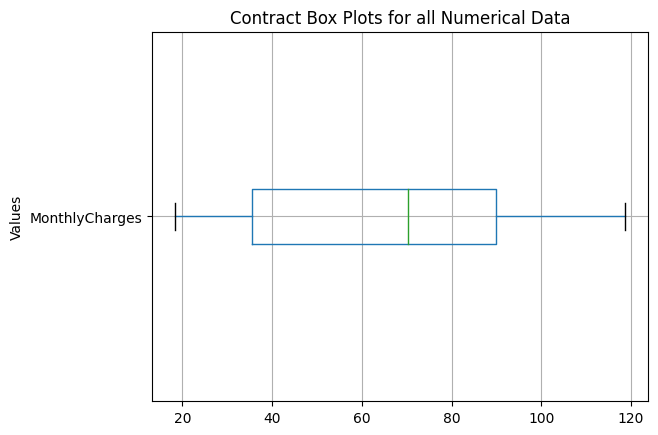

In [7]:
df_contract.boxplot(vert=False)
plt.title('Contract Box Plots for all Numerical Data')
plt.ylabel('Values')
plt.show()

The statistical data for the **contract dataframe** shows information for the MonthlyCharges column. 

The minimum cost for customers is 18.25, and the maximum price is 118.75.

The mean charge for customers is approximately 64.76, while the median cost is 70.35. This suggests that the data has a left skew.

The majority of customers are paying approximately 35.50 to 89.85 for their services. 

#### Personal dataframe

In [8]:
df_personal.info()
print('')
df_personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
df_personal.duplicated().sum()

0

In [10]:
df_personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

The **personal dataframe** consists of 5 columns and 7043 rows.

Below is a breakdown of columns:


| column name | description | datatype | numer of entries | number of misisng values |
|-------------|-------------|----------|------------------|--------------------------|
| customerID | a unique ID code for each customer 4 numbers and 5 letters | object | 7043 | 0 |
| gender | indicates whether customers are Female or Male |  object | 7043 | 0 |
| SeniorCitizen | appears to use a binary code to determine if a customer is a senior citizen 0 = no and 1 = yes |  int64 | 7043 | 0 |
| Partner | uses yes or no to indicate if a customer is a partner | object | 7043 | 0 |
| Dependents | uses yes or no to determine if a customer is a dependent/has dependents | object | 7043 | 0 |


There are no duplicate values seen in this dataset. There also do not appear to be any missing values.

All datatypes appear to be appropriate as they are. Additionally, the columns gender, SeniorCitizen, Partner and Dependents appear to be categorical in nature. 

The column names are not in snake_case.

There is no statistical data to evaluate in this dataset.



#### Internet dataframe

In [11]:
df_internet.info()
print('')
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [12]:
df_internet.duplicated().sum()

0

In [13]:
df_internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

The **personal dataframe** consists of 8 columns and 5517 rows.

Below is a breakdown of columns:

| column name | description | datatype | numer of entries | number of misisng values |
|-------------|-------------|----------|------------------|--------------------------|
| customerID | a unique ID code for each customer 4 numbers and 5 letters | object | 5517 | 0 |
| InternetService | indicates whether customers has DSL or Fiber optic |  object | 7043 | 0 |
| OnlineSecurity | uses yes or no to indicate if a customer has online security services|  int64 | 5517 | 0 |
| OnlineBackup | uses yes or no to indicate if a customer has online backup services | object | 5517 | 0 |
| DeviceProtection | uses yes or no to indicate if a customer has device protection services | object | 5517 | 0 |
| TechSupport | uses yes or no to indicate if a customer has Tech support services |  object | 5517 | 0 |
| StreamingTV | uses yes or no to indicate if a customer has Streaming TV services | 5517 | 0 |
| StreamingMovies | uses yes or no to indicate if a customer has Streaming movie services | object | 5517 | 0 |


There are no duplicate values seen in this dataset. There also do not appear to be any missing values; however, it is evident that not all Interconnect customers have internet services.

All datatypes appear to be appropriate as they are. Additionally, all columns but the customerID column appear to be categorical in nature. 

The column names are not in snake_case.

There is no statistical data to evaluate in this dataset.

#### Phone dataframe

In [14]:
df_phone.info()
print('')
df_phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [15]:
df_phone.duplicated().sum()

0

In [16]:
df_phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

The **phone dataframe** consists of 2 columns and 6360 rows.

Below is a breakdown of columns:

| column name | description | datatype | numer of entries | number of misisng values |
|-------------|-------------|----------|------------------|--------------------------|
| customerID | a unique ID code for each customer 4 numbers and 5 letters | object | 6361 | 0 |
| MultipleLines | uses yes or no to indicate if a customer has device protection services |  object | 6361 | 0 |

There are no duplicate values seen in this dataset. There also do not appear to be any missing values; however, it is evident that not all Interconnect customers have phone service.

All datatypes appear to be appropriate as they are. Additionally, the column MultipleLines appears to be categorical in nature. 

The column names are not in snake_case.

There is no statistical data to evaluate in this dataset.


## Work Plan

**Plan of Action**

Based on an initial evaluation of the data, the following steps are needed to build the model and evaluate the results:

**Step 1:** Data processing, cleaning, and feature engineering
* Download the additional libraries needed to complete the EDA, models, and model evaluation metrics
* Merge the dataset using the customerID column and determine how to handle the resulting missing values
* Change the case for the columns
* Explore the two date-based columns to determine how to best handle the data type
  

**Step 2:** EDA
* Explore the columns that appear to be categorical to determine if they are categorical.
* If they are categorical, determine the best categorical encoding method to use to alter data for machine learning.
* Additionally, look for class imbalances in each of the columns and determine which resampling method is best for handling any imbalances discovered.
* Explore features within the dataset to see if there are features that appear to have more influence on whether a customer is likely to stay or leave the Interconnect.


**Step 3:** Preparing the data for the models
* Split the data into training and testing sets using an 80/20 split
* Define the features and target variables
* Employ the best encoding methods for categorical columns
  

**Step 4:** Training the models
* Define the AUC-ROC metric
* Since this is a binary classification task, I will test the following models using a k-fold method for hyperparameter tuning: Dummy Classifier (for sanity testing purposes), Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbor, LGBMClassifier, XGBMClassifier, and CatBoostClassifier
* I will test the models 3 times: once without addressing class imbalances, once with an upsampling method, and once with a downsampling method
* I will analyze the results using the AUC-ROC metric and select the best model for testing


**Step 5:** Testing the best model
* I will conduct a final test on the model that produced the best AUC-ROC metric
  

**Step 6:** Comprehensive Report
* I will conclude this project by writing a final overview of the project's steps and a report explaining my findings and recommendations.





**Questions**

For the contract dataframe, I think that the specific start and end dates of the contract are perhaps less important than the length of the contract. I believe I should create a new column that calculates the length of each contract by month and drop the start and end date columns from the dataframe. Does this sound like a logical step, or would it be best to leave these dates in the dataframe?

Are there any other features columns that might be useful to create and add to the merged dataframe?

My research has discovered that the 7 models I have selected are good for binary classification tasks. Still, I also know that each model costs for training. Is it better to be more selective about the models that I would use for training and say narrow it down to 3-5 models, or is it okay to proceed with training 7 models plus the dummy model?

I believe it would be beneficial to identify which features are most significant in determining the churn rate, as this could help Interconnect quickly identify users who are at the greatest risk of leaving the company and potentially inform their future marketing strategies. Do you think this is a useful step in the process?

Based on your expertise, are there any steps that I've missed or could add to improve this project?

In the future, when reviewing data before creating a work plan, are there additional steps that should be taken before devising the work plan?


## Step 1: Data processing, cleaning, and feature engineering

### Initialization with additional libraries

In this step, I will download the additional libraries needed for exploratory data analysis, the models, and for the model evaluation.

In [14]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.utils import resample, shuffle

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc

import time
from collections import Counter
from sklearn.pipeline import Pipeline

### Merging the dataframes

Before mergining the dataframes, I am going to check to make sure that all the customer_ids that are in the personal, internet, and phone dataframes are also in the contract dataframe. Ensuring there are no new ids will prevent issues later with data cleaning or features engineering.

In [15]:
display(df_personal[~df_personal['customerID'].isin(df_contract['customerID'])])

,customerID,gender,SeniorCitizen,Partner,Dependents


In [16]:
display(df_internet[~df_internet['customerID'].isin(df_contract['customerID'])])

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [17]:
display(df_phone[~df_phone['customerID'].isin(df_contract['customerID'])])

,customerID,MultipleLines


It looks like all the customerIDs that are in the personal, internet, and phone dataframes can also be found in the contract datafraome.

In [18]:
# Merge the dataframes using the customerID column
df_merged = df_contract.merge(df_personal, how = 'outer', on = 'customerID')
df_merged = df_merged.merge(df_internet, how = 'outer', on = 'customerID')
df_merged = df_merged.merge(df_phone, how = 'outer', on = 'customerID')

df_merged.info()
print('')
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [19]:
df_merged.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [20]:
df_merged.duplicated().sum()

0

The merging of dataframes appears successful. There are now 20 columns and 7043 rows. There are now 8 columns with missing data that come from the internet and phone dataframes. There are no duplicate values.

### Handling Missing Values

Now that I have merged the dataframes together, the new dataframe has missing values. I will explore those missing values to determine the next steps in the model evalution.

In [21]:

print(f"Internet Service Unique Values: {df_merged['InternetService'].unique()}")
print('')
print(f"Online Security Unique Values: {df_merged['OnlineSecurity'].unique()}")
print('')
print(f"Online Backup Unique Values: {df_merged['OnlineBackup'].unique()}")
print('')
print(f"Device Protection Unique Values: {df_merged['DeviceProtection'].unique()}")
print('')
print(f"Tech Support Unique Values: {df_merged['TechSupport'].unique()}")
print('')
print(f"Streaming TV Unique Values: {df_merged['StreamingTV'].unique()}")
print('')
print(f"Streaming Movies Unique Values: {df_merged['StreamingMovies'].unique()}")
print('')
print(f"Multiple Lines Unique Values: {df_merged['MultipleLines'].unique()}")


Internet Service Unique Values: ['DSL' 'Fiber optic' nan]

Online Security Unique Values: ['No' 'Yes' nan]

Online Backup Unique Values: ['Yes' 'No' nan]

Device Protection Unique Values: ['No' 'Yes' nan]

Tech Support Unique Values: ['No' 'Yes' nan]

Streaming TV Unique Values: ['No' 'Yes' nan]

Streaming Movies Unique Values: ['No' 'Yes' nan]

Multiple Lines Unique Values: [nan 'No' 'Yes']


I feel that the missing values need to be left as their own category for our machine learning models. While I can assume that a missing value means a customer does not have the service (because they most likely do not have internet or phone service), using a no could be misleading in the interpretation of churn rate. Therefore, I will fill in the missing values using the string 'missing'. That way, when I use OneHotEncoder, the encoder can interpret missing values as a separate category.

In [22]:
df_merged = df_merged.fillna('missing')

df_merged.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [23]:
print(f"Internet Service Unique Values: {df_merged['InternetService'].unique()}")
print('')
print(f"Online Security Unique Values: {df_merged['OnlineSecurity'].unique()}")
print('')
print(f"Online Backup Unique Values: {df_merged['OnlineBackup'].unique()}")
print('')
print(f"Device Protection Unique Values: {df_merged['DeviceProtection'].unique()}")
print('')
print(f"Tech Support Unique Values: {df_merged['TechSupport'].unique()}")
print('')
print(f"Streaming TV Unique Values: {df_merged['StreamingTV'].unique()}")
print('')
print(f"Streaming Movies Unique Values: {df_merged['StreamingMovies'].unique()}")
print('')
print(f"Multiple Lines Unique Values: {df_merged['MultipleLines'].unique()}")

Internet Service Unique Values: ['DSL' 'Fiber optic' 'missing']

Online Security Unique Values: ['No' 'Yes' 'missing']

Online Backup Unique Values: ['Yes' 'No' 'missing']

Device Protection Unique Values: ['No' 'Yes' 'missing']

Tech Support Unique Values: ['No' 'Yes' 'missing']

Streaming TV Unique Values: ['No' 'Yes' 'missing']

Streaming Movies Unique Values: ['No' 'Yes' 'missing']

Multiple Lines Unique Values: ['missing' 'No' 'Yes']


The misisng values have been successfully filled in with the string 'missing'.

### Change the column names into snake_case

The column names were not originally listed in the standard snake_case. I will change the case of the column names for easier evalution and uniformity.

In [24]:
df_merged = df_merged.rename(columns = {'customerID': 'customer_id',
                                        'BeginDate': 'begin_date', 
                                        'EndDate': 'end_date', 'Type': 'type',
                                        'PaperlessBilling': 'paperless_billing',
                                        'PaymentMethod': 'payment_method', 
                                        'MonthlyCharges': 'monthly_charges', 
                                        'TotalCharges': 'total_charges', 
                                        'SeniorCitizen': 'senior_citizen',
                                        'Partner': 'partner', 'Dependents': 'dependents',
                                        'InternetService': 'internet_service',
                                       'OnlineSecurity': 'online_security', 
                                        'OnlineBackup': 'online_backup', 
                                       'DeviceProtection': 'device_protection',
                                       'TechSupport': 'tech_support',
                                       'StreamingTV': 'streaming_tv',
                                       'StreamingMovies': 'streaming_movies',
                                       'MultipleLines': 'multiple_lines'})

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

All of the columns are now in snake_case

### Handling the date columns

Two date columns appear in the dataframe. Currently, they are in an object datatype. I will explore the information in these columns to determine the best approach for handling them.

In [26]:
df_merged['begin_date'].head(10)

0    2020-01-01
1    2017-04-01
2    2019-10-01
3    2016-05-01
4    2019-09-01
5    2019-03-01
6    2018-04-01
7    2019-04-01
8    2017-07-01
9    2014-12-01
Name: begin_date, dtype: object

In [27]:
df_merged['end_date'].head(10)

0                     No
1                     No
2    2019-12-01 00:00:00
3                     No
4    2019-11-01 00:00:00
5    2019-11-01 00:00:00
6                     No
7                     No
8    2019-11-01 00:00:00
9                     No
Name: end_date, dtype: object

The timestamp in the end_date column appears to be all 00:00:00, so this does not seem to add value to the data. I plan to drop the dates.

Overall, for predicting the churn rate, it appears that tenure with the company is more important than the actual dates a customer began or ended their contracts. I am going to change the datatypes of these columns to datetime so that I can extract the tenure information and create a new column named tenure. I will also create a new column called ended_services. After that, I will drop both date columns.

In [28]:
ended_service_list = []

for row in df_merged.itertuples():
    if row.end_date == 'No':
        ended_service_list.append('No')
    else:
        ended_service_list.append('Yes')
        
df_merged['ended_service'] = ended_service_list

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

In [30]:

# View both columns 
df_merged[['end_date', 'ended_service']].head(10)



,end_date,ended_service
0,No,No
1,No,No
2,2019-12-01 00:00:00,Yes
3,No,No
4,2019-11-01 00:00:00,Yes
5,2019-11-01 00:00:00,Yes
6,No,No
7,No,No
8,2019-11-01 00:00:00,Yes
9,No,No


The new column has been created and appears to correspond correctly with the end_date column.

Next, I am going to change the datatype of the date column to a more appropriate datatype--datetime. This will allow me to use the two columns to feature engineer a new column that will calculate the length of each contract. For the date of contracts that have not been terminated, I will use the last date that the data was verified (2020-02-01).

In [31]:
# change the datatype for the begin_date column
df_merged['begin_date'] = pd.to_datetime(df_merged['begin_date'])

# change the 'No's in the end_date column to the last date the data was verified
df_merged['end_date'] = df_merged['end_date'].replace('No', '2020-02-01')

# change the datatype for the end_date column
df_merged['end_date'] = pd.to_datetime(df_merged['end_date']).dt.normalize()


# Check to make sure changes happened
df_merged.info()
print('')
df_merged['end_date'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   7043 non-null   object        
 13  online_security    7043 non-null   object        
 14  online_b

0   2020-02-01
1   2020-02-01
2   2019-12-01
3   2020-02-01
4   2019-11-01
Name: end_date, dtype: datetime64[ns]


The datatype for the two columns has been changed.

Additionally, the 'No's in the end_date column have been changed to the date of the last time the data was verified in order to calculate the current length of each contract.

In [32]:
# Calculate contract length in days
df_merged['contract_length'] = (df_merged['end_date'] - df_merged['begin_date']).dt.days

# View the results
df_merged[['begin_date', 'end_date', 'contract_length']].head(10)


,begin_date,end_date,contract_length
0,2020-01-01,2020-02-01,31
1,2017-04-01,2020-02-01,1036
2,2019-10-01,2019-12-01,61
3,2016-05-01,2020-02-01,1371
4,2019-09-01,2019-11-01,61
5,2019-03-01,2019-11-01,245
6,2018-04-01,2020-02-01,671
7,2019-04-01,2020-02-01,306
8,2017-07-01,2019-11-01,853
9,2014-12-01,2020-02-01,1888


The new column has been created to calculate the length of the contracts. I will now drop the date columns as they are not as important for our machine learning.

Now that I have extracted the relevant information that I need from the date columns to create two new features, I am going to drop the date columns from the dataframe.

In [33]:
df_merged.drop(['begin_date', 'end_date'], axis=1, inplace=True)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   object 
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   int64  
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  internet_service   7043 non-null   object 
 11  online_security    7043 non-null   object 
 12  online_backup      7043 non-null   object 
 13  device_protection  7043 non-null   object 
 14  tech_support       7043 non-null   object 
 15  streaming_tv       7043 non-null   object 
 16  streaming_movies   7043 

The start_date and end_date columns have been removed from the dataframe.

### Changing the datatype for the total_charges column

This is a change for the initial work plan, as further analysis of this column indicates that it is not in the appropriate data type. I will be changing it to a float datatype.

In [34]:
# Checking values
print("Checking for spaces in total_charges:")
space_mask = df_merged['total_charges'] == ' '
print(f"Number of spaces found: {space_mask.sum()}")

# Replace spaces with NaN, then convert to numeric
df_merged['total_charges'] = df_merged['total_charges'].replace(' ', np.nan)
df_merged['total_charges'] = pd.to_numeric(df_merged['total_charges'], errors='coerce')

print(f"Data type after conversion: {df_merged['total_charges'].dtype}")
print(f"Number of NaN values: {df_merged['total_charges'].isnull().sum()}")

Checking for spaces in total_charges:
Number of spaces found: 11
Data type after conversion: float64
Number of NaN values: 11


### Handling the NaN values in the dataframe

In [35]:
# Find the percentage of NaN values in the dataframe
nan_percentage = df_merged['total_charges'].isnull().mean()*100

print(f"Percentage of NaN values in the total_charges column: {nan_percentage:.2f}%")

Percentage of NaN values in the total_charges column: 0.16%


It looks as though the percentage of NaN values in the total_charges column makes a very small percentage of the total data. Because of this, I am going to opt to drop the rows containing the NAN values.

In [36]:
print(f"Number of rows before dropping NaN Values: {df_merged.shape[0]}")

df_merged.dropna(subset=['total_charges'], inplace=True)

print(f"Number of rows after dropping NaN Values: {df_merged.shape[0]}")

Number of rows before dropping NaN Values: 7043
Number of rows after dropping NaN Values: 7032


The 11 rows have been successfully dropped.

The dateframe looks ready for the next steps. 
* All dataframes have been successfully merged
* All the case for the columns have been changed to snake_case
* Missing values have been dealt with in a way that prepares them for machine learning
* The date columns were used to create two new columns 'ended_service' and 'contract_length'
* The date columns were dropped from the dataframe
* The total_charges column was switched to a float64 datatype
* The NaN values from the total_charges column were dropped

## Step 2: Exploratory Data Analysis

### Exploring categorical columns

Several of the columns in the dataframe appear to be categorical in nature. In this step, I will verify which columns are categorical columns in order to best determine how to handle these columns for our predictive models.

In [37]:
# Find the categorical columns
categorical_cols = df_merged.select_dtypes(include=['object', 'int64', 'category']).columns.tolist()

categories = [col for col in categorical_cols
             if df_merged[col].nunique() < 15]

print("Categorical columns:", categories)
print('')
print("Categorical column total:", len(categories))

Categorical columns: ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines', 'ended_service']

Categorical column total: 16


As suspected, many of the columns are categorical in nature. First, let's change the datatype to categorical. 

In [38]:
categorical_cols = categories

df_merged[categorical_cols] = df_merged[categorical_cols].astype('category')

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7032 non-null   object  
 1   type               7032 non-null   category
 2   paperless_billing  7032 non-null   category
 3   payment_method     7032 non-null   category
 4   monthly_charges    7032 non-null   float64 
 5   total_charges      7032 non-null   float64 
 6   gender             7032 non-null   category
 7   senior_citizen     7032 non-null   category
 8   partner            7032 non-null   category
 9   dependents         7032 non-null   category
 10  internet_service   7032 non-null   category
 11  online_security    7032 non-null   category
 12  online_backup      7032 non-null   category
 13  device_protection  7032 non-null   category
 14  tech_support       7032 non-null   category
 15  streaming_tv       7032 non-null   category
 16  stream

Now that the datatype has been changed, let's look to see how many unique values each column has and the value counts for each unique value.

In [39]:
categorical_cols = df_merged.select_dtypes(include=['category']).columns.tolist()

for col in categorical_cols:
    print(f"---Value Counts for: {col} ---")
    print(df_merged[col].value_counts())
    print('')

---Value Counts for: type ---
Month-to-month    3875
Two year          1685
One year          1472
Name: type, dtype: int64

---Value Counts for: paperless_billing ---
Yes    4168
No     2864
Name: paperless_billing, dtype: int64

---Value Counts for: payment_method ---
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_method, dtype: int64

---Value Counts for: gender ---
Male      3549
Female    3483
Name: gender, dtype: int64

---Value Counts for: senior_citizen ---
0    5890
1    1142
Name: senior_citizen, dtype: int64

---Value Counts for: partner ---
No     3639
Yes    3393
Name: partner, dtype: int64

---Value Counts for: dependents ---
No     4933
Yes    2099
Name: dependents, dtype: int64

---Value Counts for: internet_service ---
Fiber optic    3096
DSL            2416
missing        1520
Name: internet_service, dtype: int64

---Value Counts for: online_security ---
No         3

So the selected columns all do have limited unique values so it is clear that they are indeed categorical columns with 2-4 unique values each. 

It appears that the senior_citizen column has already been adjusted in a method that is best for the predictive models, but the other columns have not yet been adjusted. To handle categorical information, I will use OneHotEncoder to handle the categorical data. I will use this technique in step 3.

### Checking for class imbalances


The gender and partner column appear pretty balanced, but most columns clearly have some class imbalances happening. Let's look into this more.

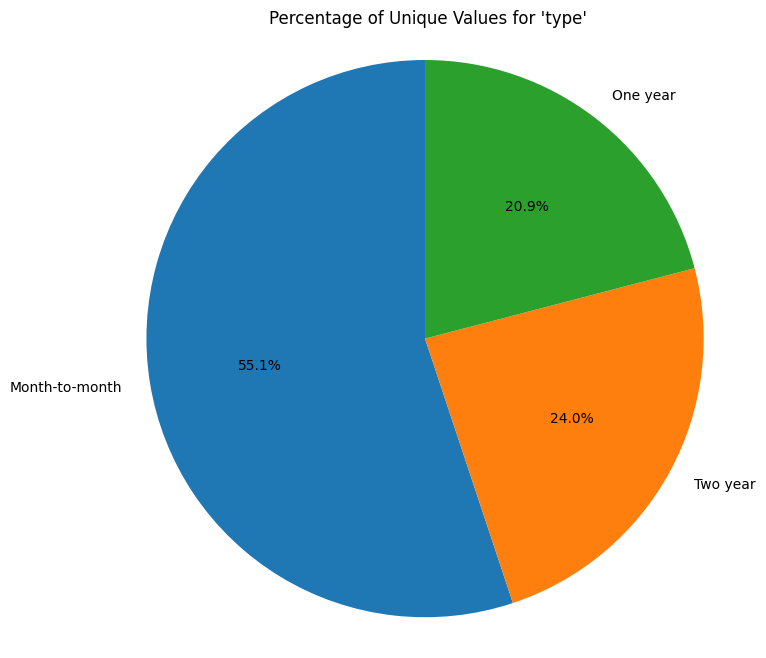

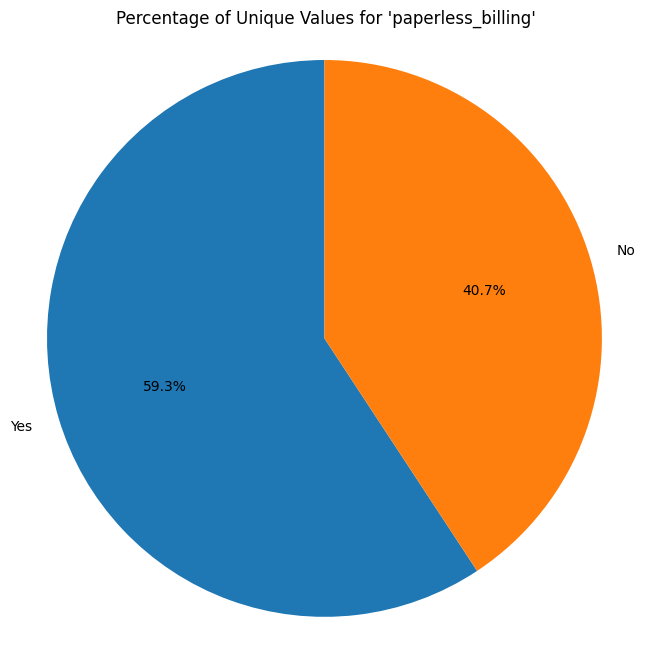

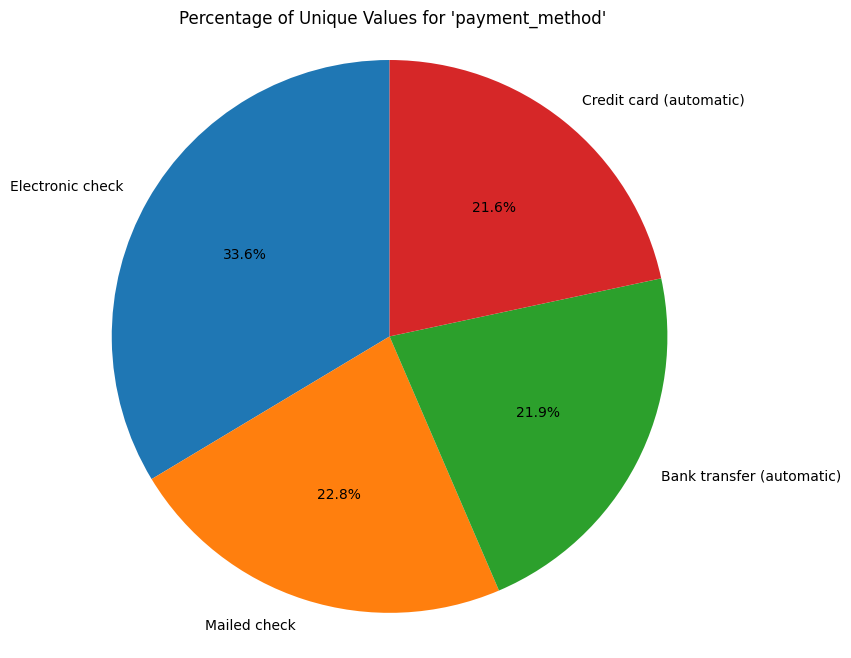

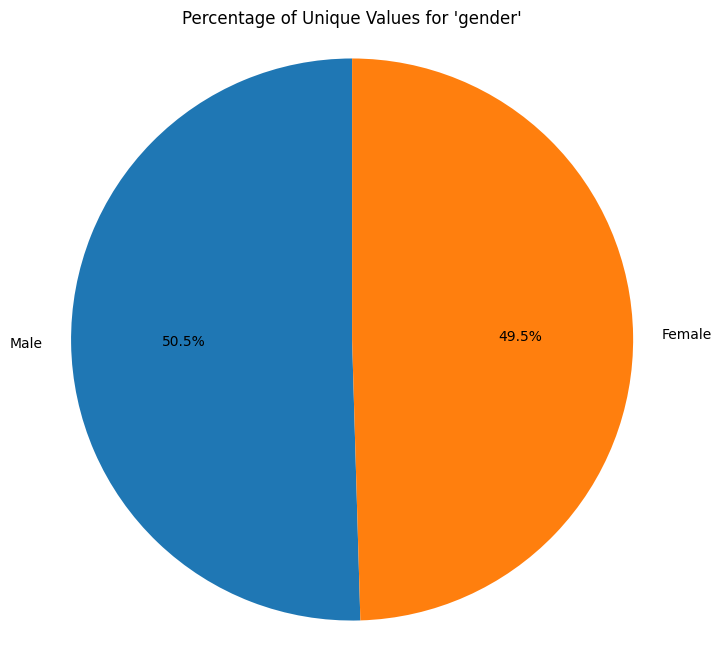

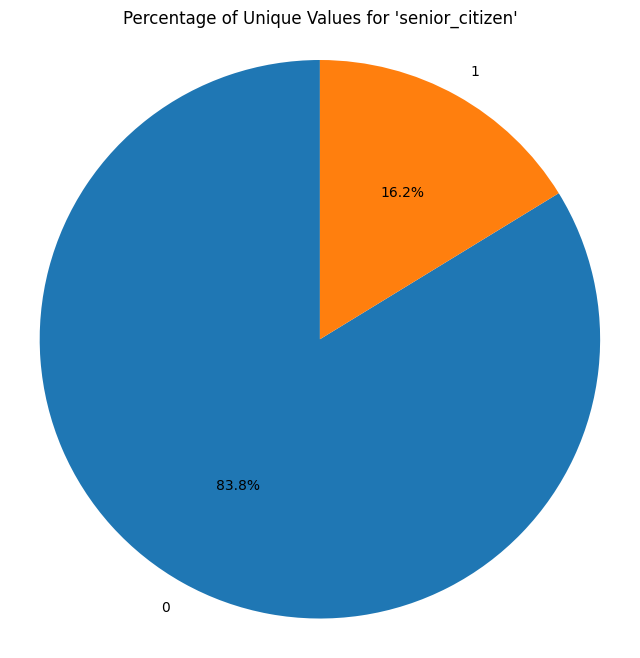

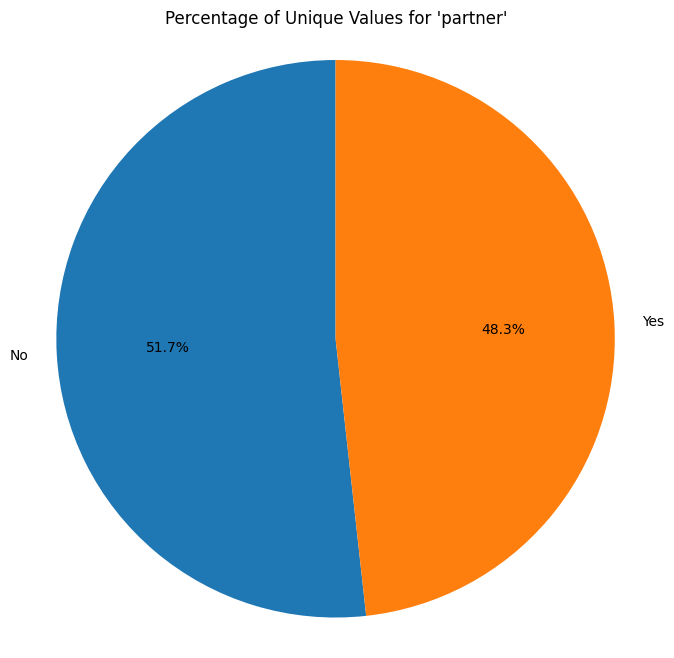

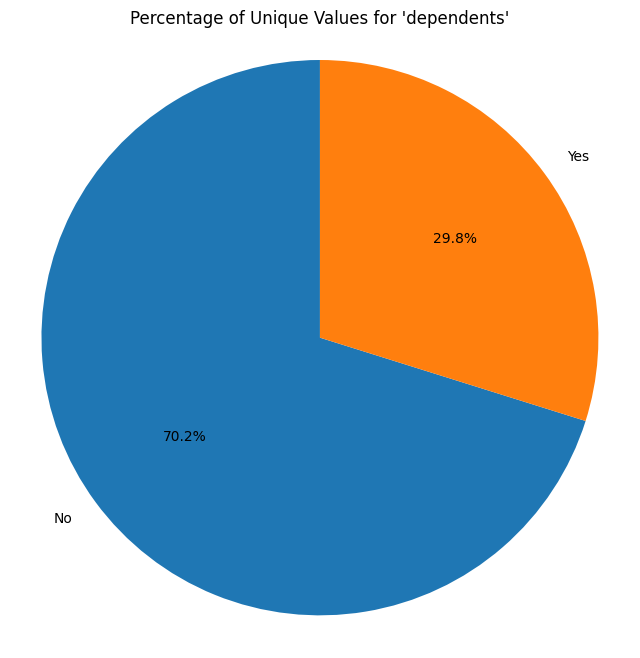

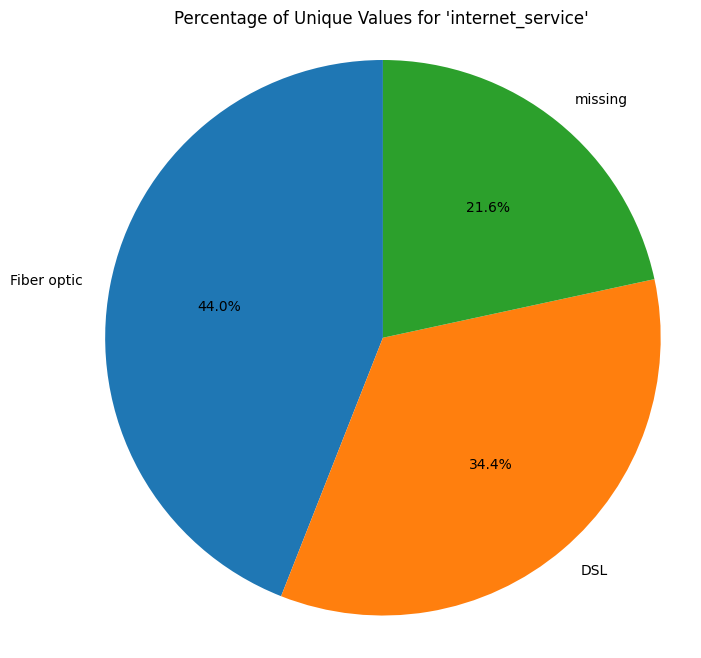

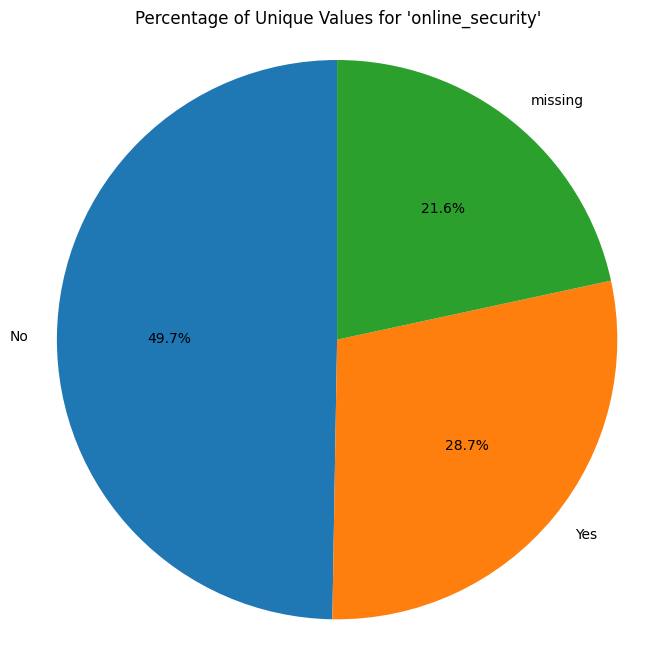

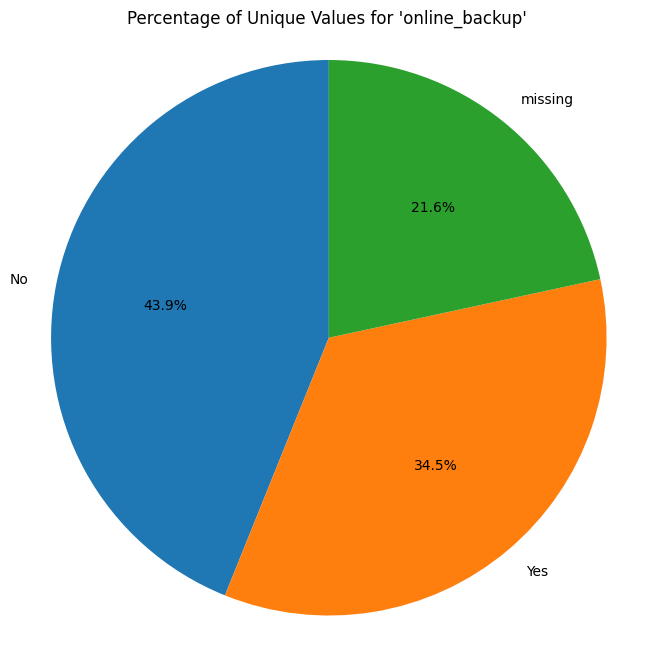

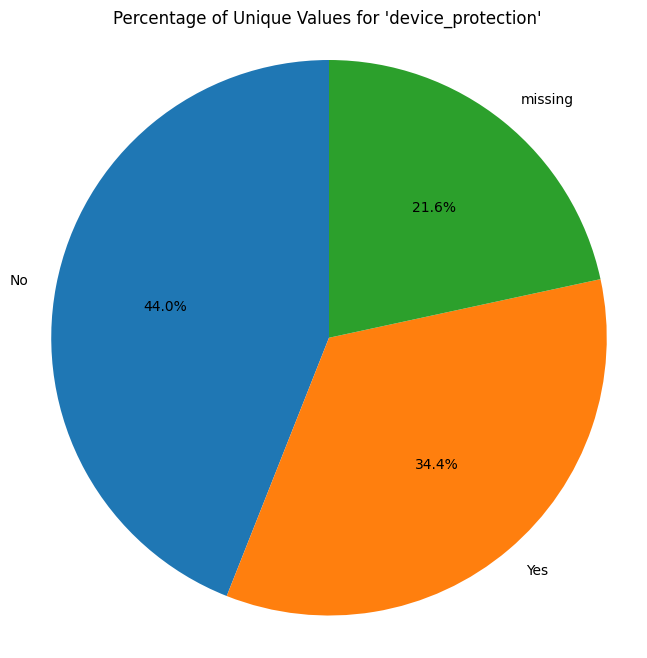

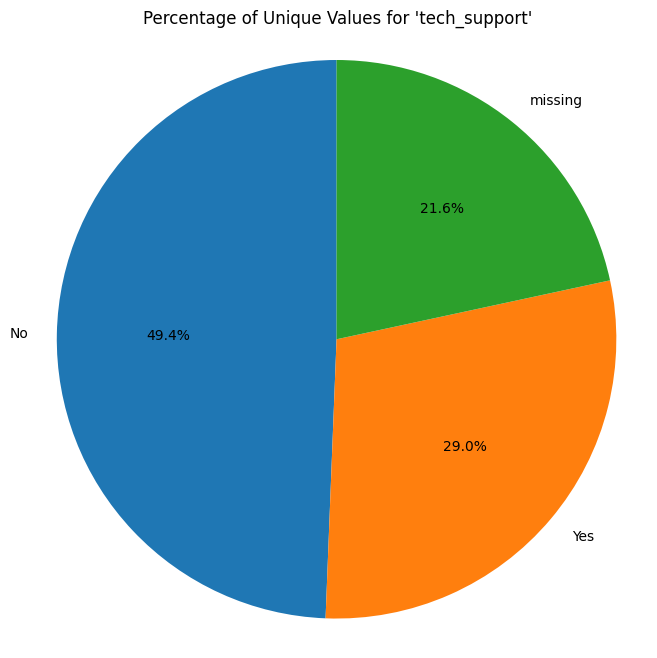

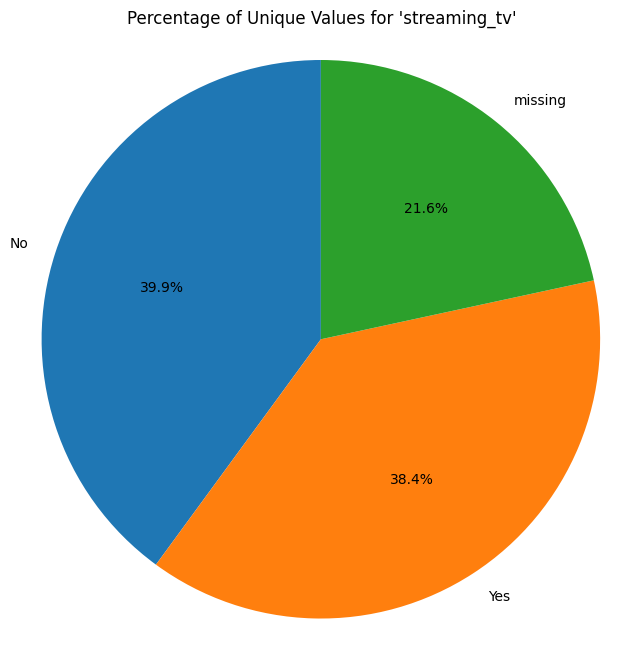

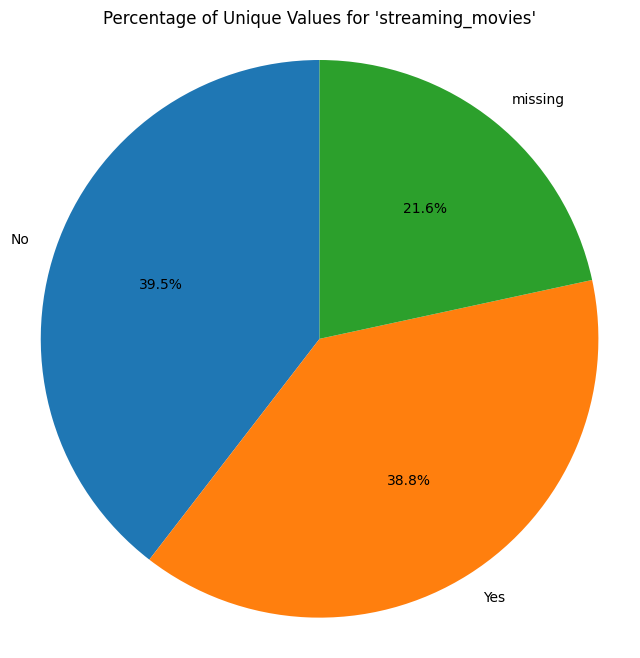

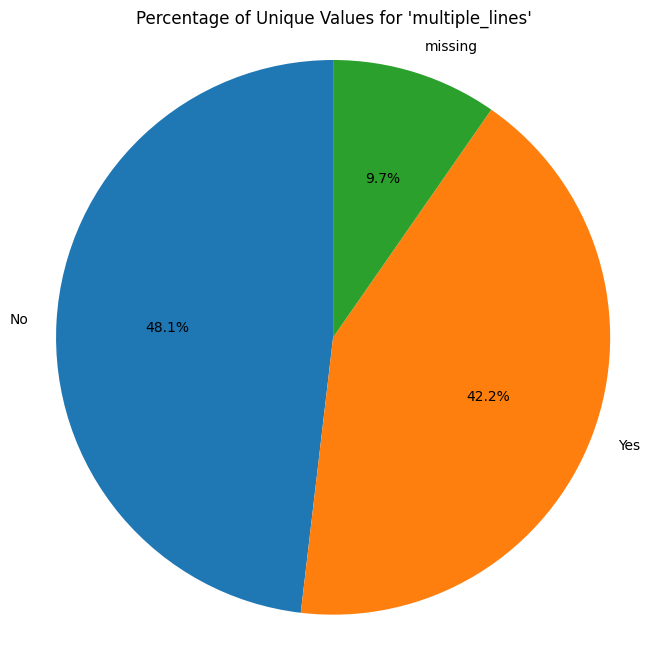

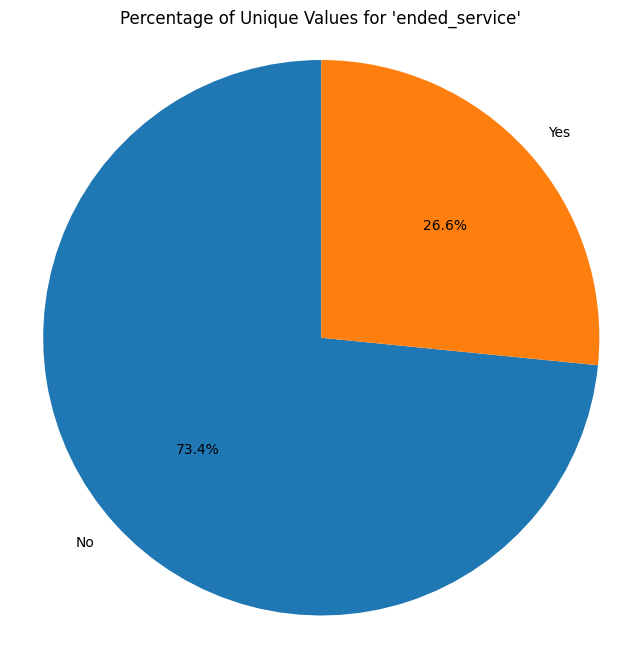

In [40]:
for col in categorical_cols:
    counts = df_merged[col].value_counts()
    labels = counts.index

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title(f"Percentage of Unique Values for '{col}'")
    plt.axis('equal')

    plt.show()

    

Looking at the pie charts helps to put into perspective the imbalances that exist in each of the categorical columns. While some columns are closer to being balanced, others show significant imbalances. Considering this for our models, some imbalances could affect the accuracy of our predictions. 

To determine the impact of class imbalance on the model, I will complete three iterations of model training. On the first iteration, I will run the models without addressing the imbalance. On the second iteration, I will run the models using downsampling to address the imbalance. On the final iteration, I will run the models using upsampling to address the imbalance. 

I will address each imbalance during the 4th step when training the models.

### Exploring the features for impact

It appears that Interconnect has a churn rate of about 26.5%. Many features appear to influence whether a customer stays or leaves the company. I am curious to know if certain features have more influence over a customer's decision to leave. While Interconnect should take a holistic view of the customer when determining vulnerability for churn, it might also be helpful to identify which features have a heavier influence on churn rate, so that they can target vulnerable customers sooner.

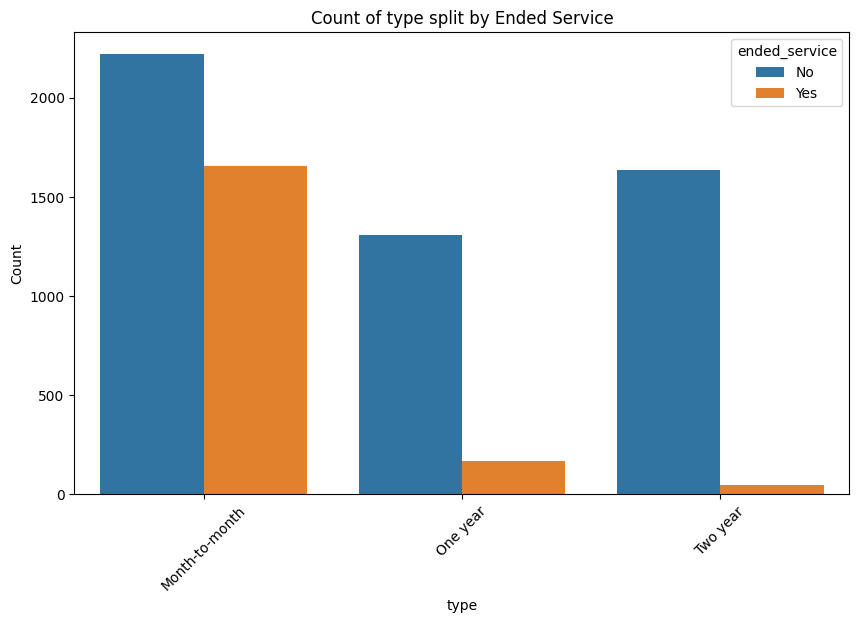

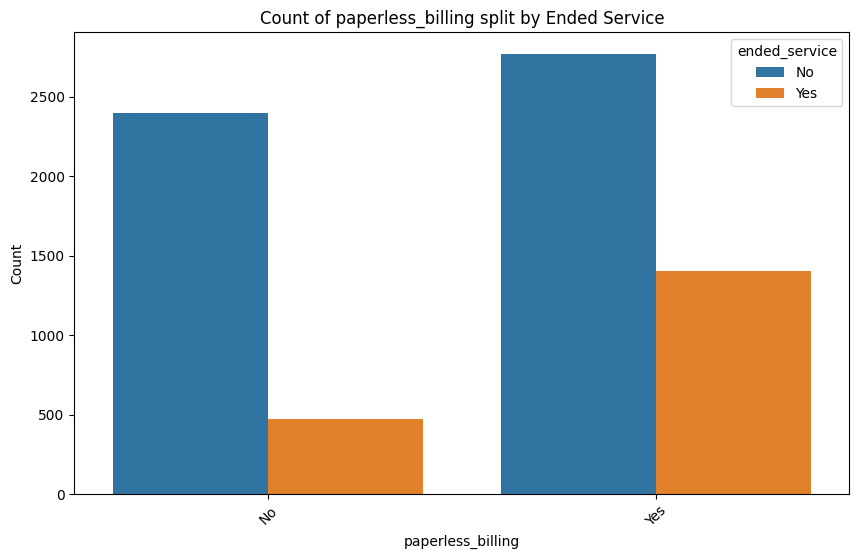

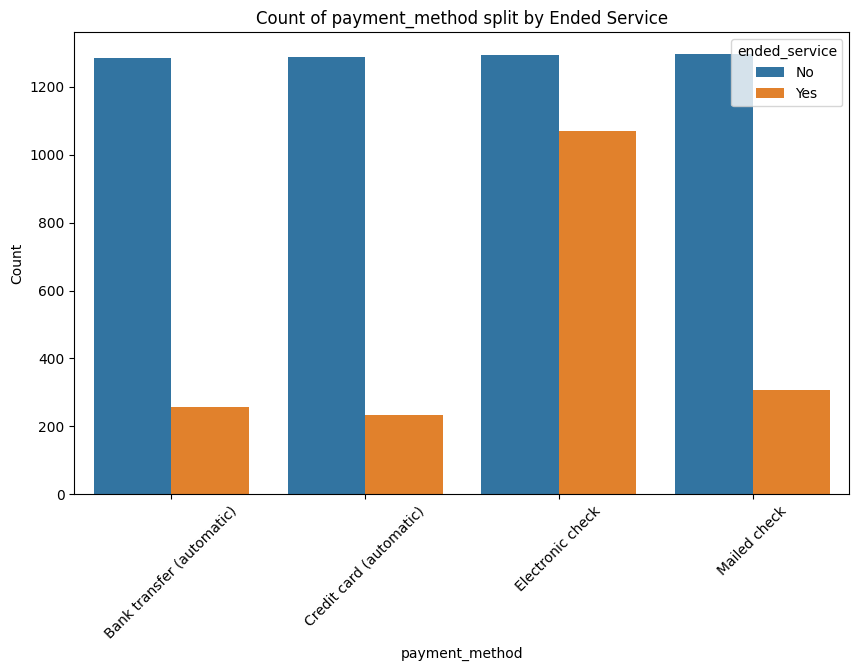

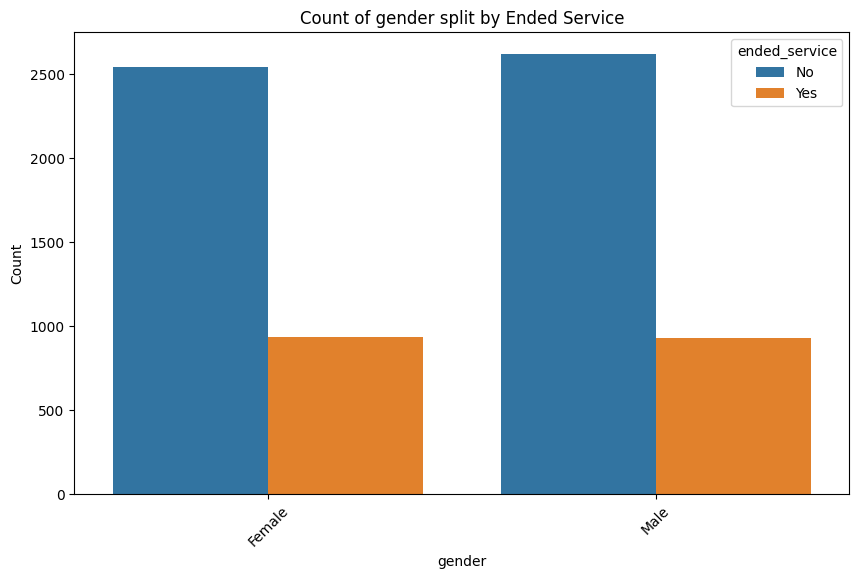

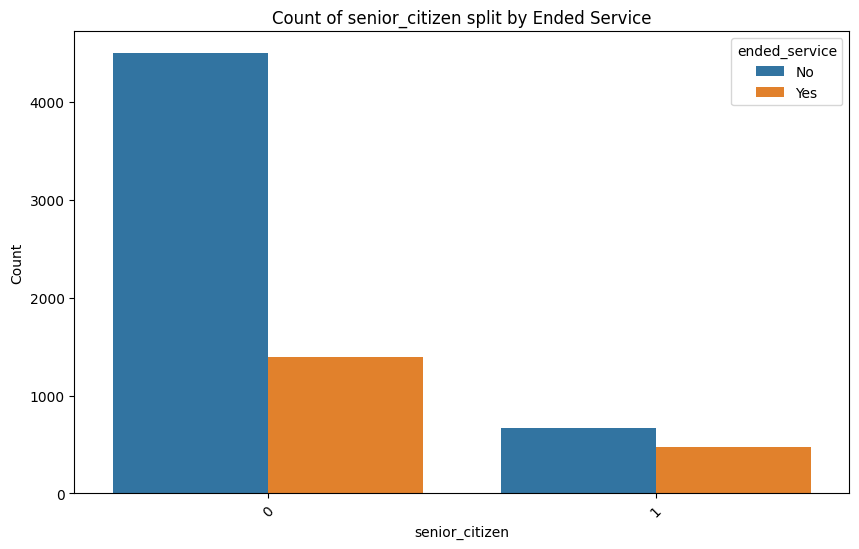

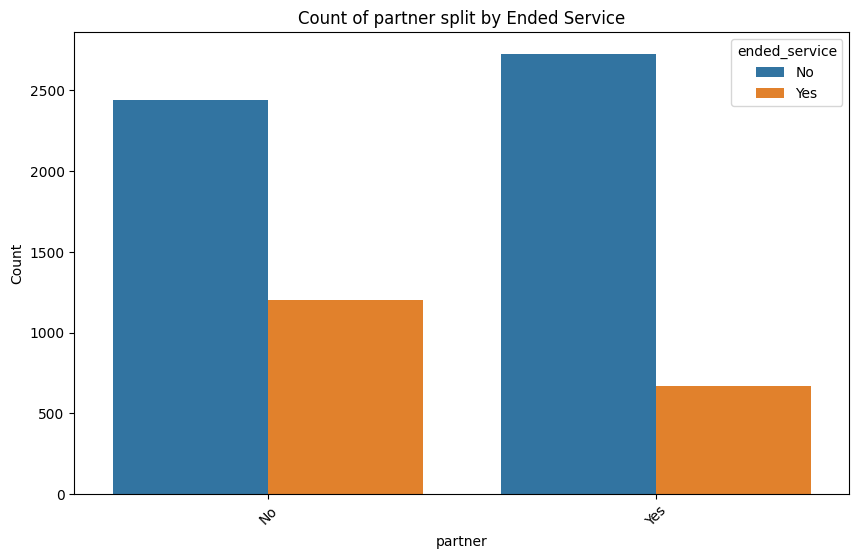

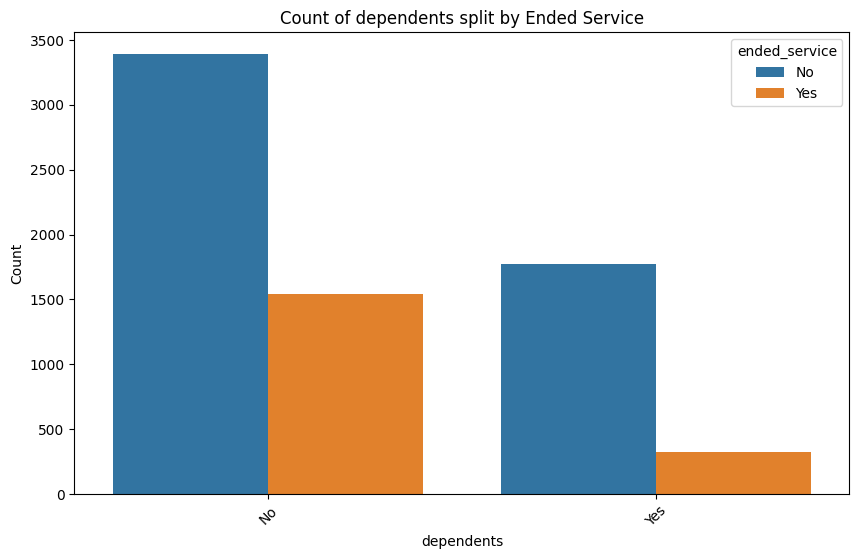

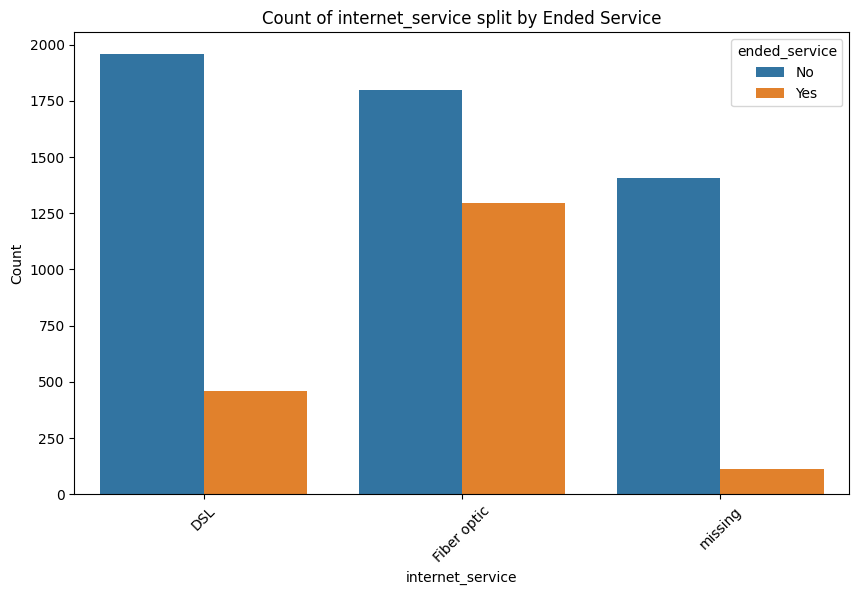

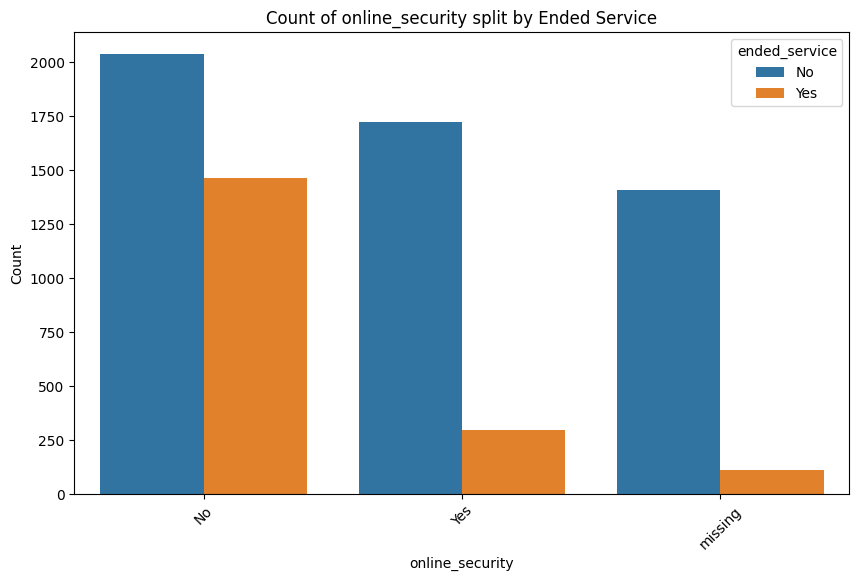

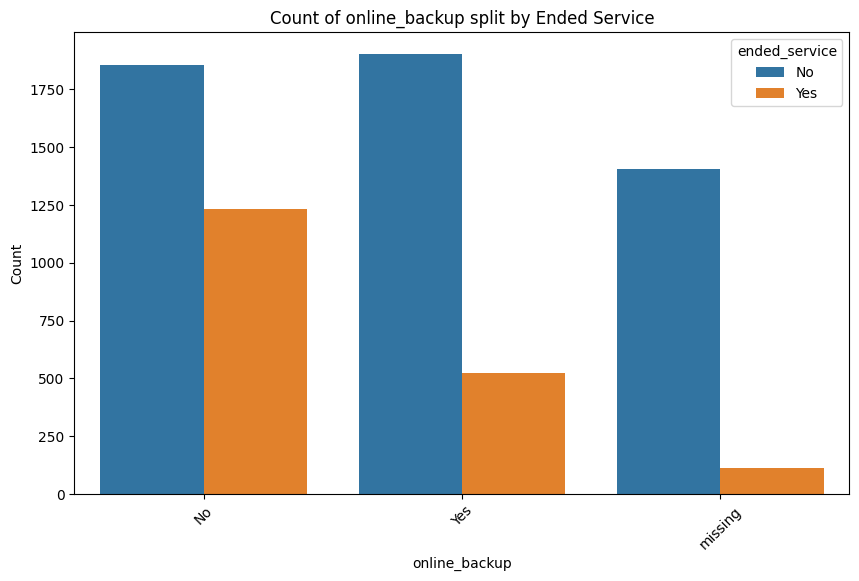

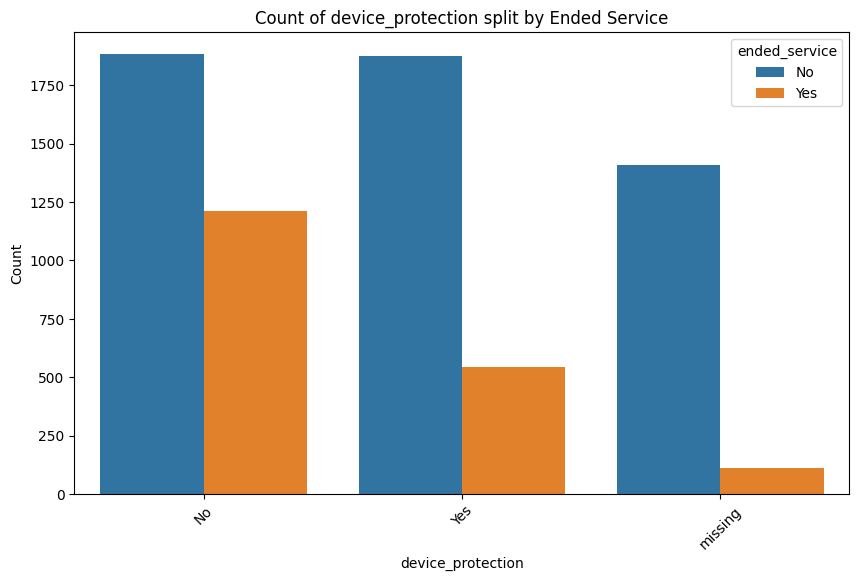

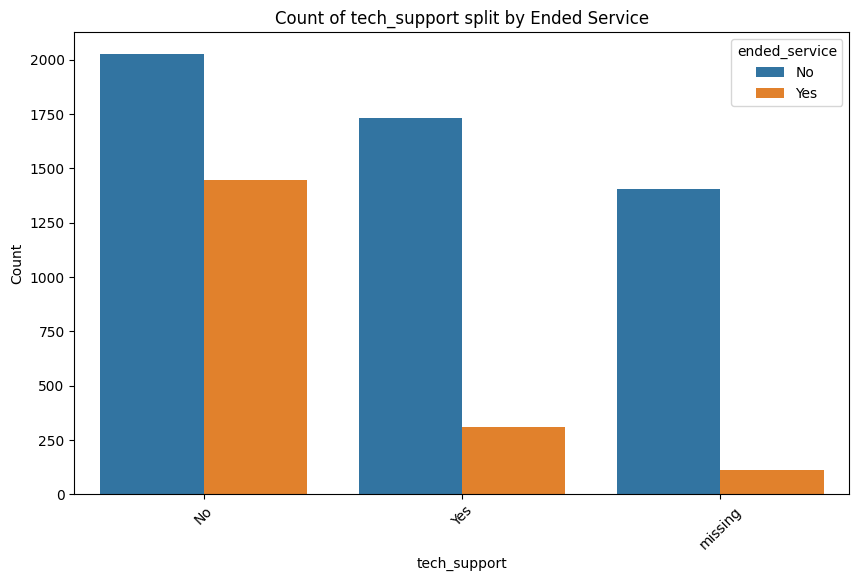

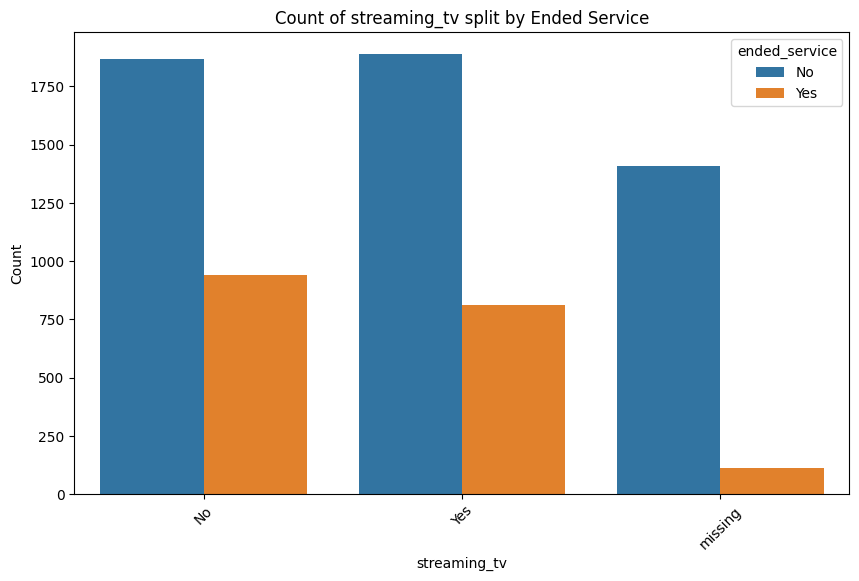

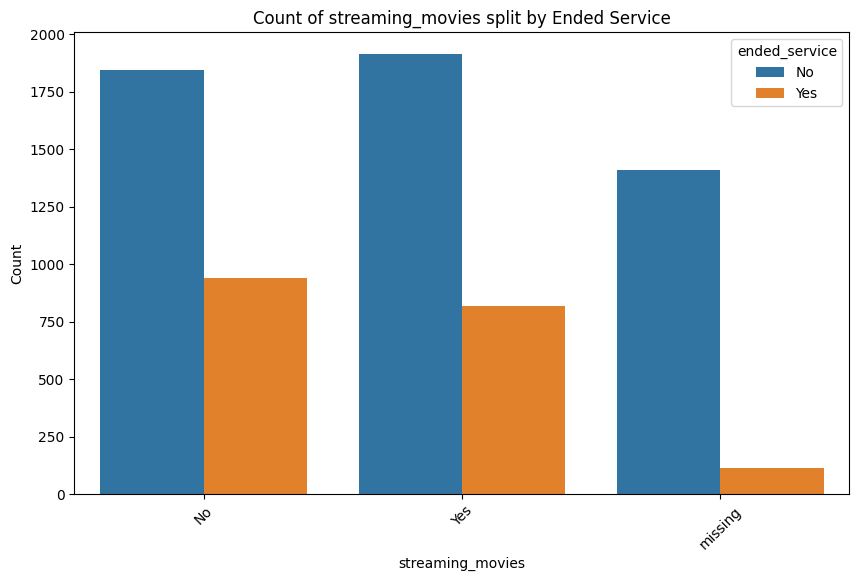

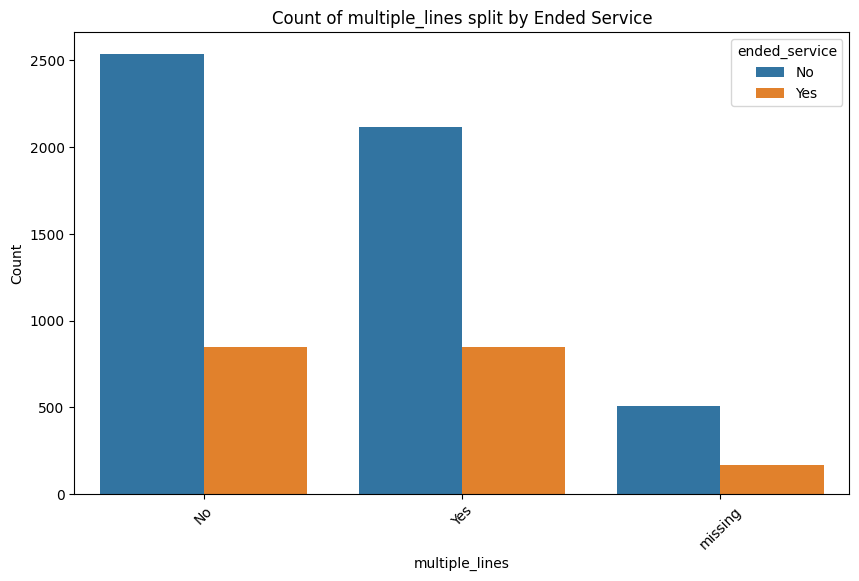

In [41]:
# Create features for categorical columns by excluding 'ended_service' from the list
categorical_features = [col for col in categorical_cols if col != 'ended_service']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_merged, x=feature, hue='ended_service')
    plt.title(f'Count of {feature} split by Ended Service')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

A break down of the categorical columns show that some features do not seem to be indicators of whether a customer will stay or leave Interconnect, but other features appear to have a big impact on churn. For instance, streaming services, gender, and number of lines are not real indicators of whether a customer will churn or not. 

On the other hand the othe features do seem to have am impact. Here is a breakdown:

* Billing- customers are most likely to churn if they are on month to month billing but less likely to churn if they are on a 2 year contract.
* Paperless billing- interestingly enough, customers are more likely to leave if they receive paperless billing over those who do not.
* Payment Method- customeres are most likely to churn if they are paying using electronic checks and are least likely to leave if they are using an automatic payment method.
* senior citizens- senior citizens are more likely to continue service while younger customers are more likely to leave.
* Partners and Dependent- customers with partners are dependents, especially, are more likely to stay with Interconnect
* Internet Serices- Customers are more likely to churn if they have the fiber optic services versus the DSL service.
* When it comes to all internet services, customers were more likely to stay if they had the additional services. In particular, device protection,  online security and tech support seemed to have the biggest impact on whether a customer stayed or left the Interconnect.

Looking at these features, it seems that Interconnect could use strategies such as offering discounts for 2 year contracts, automatic payment methods, DSL lines and added internet services to new and existing customers to decrease the likelihood of customers leaving their services.


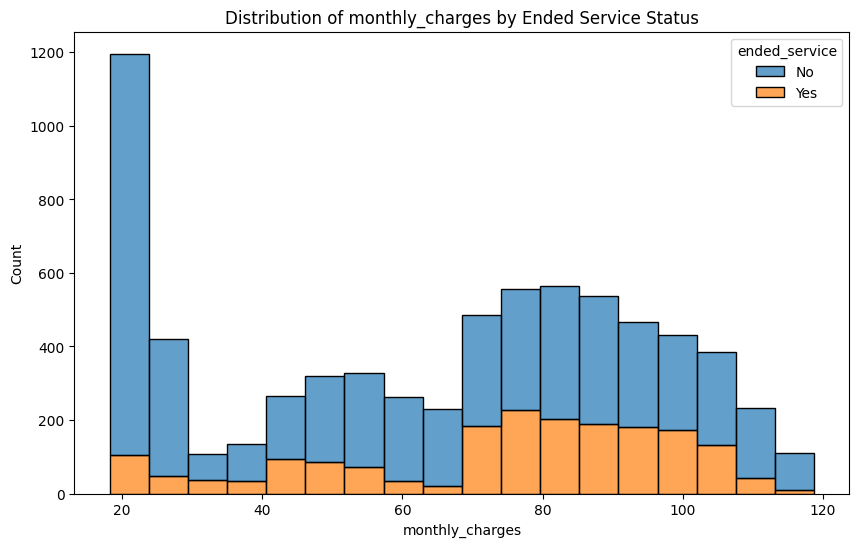

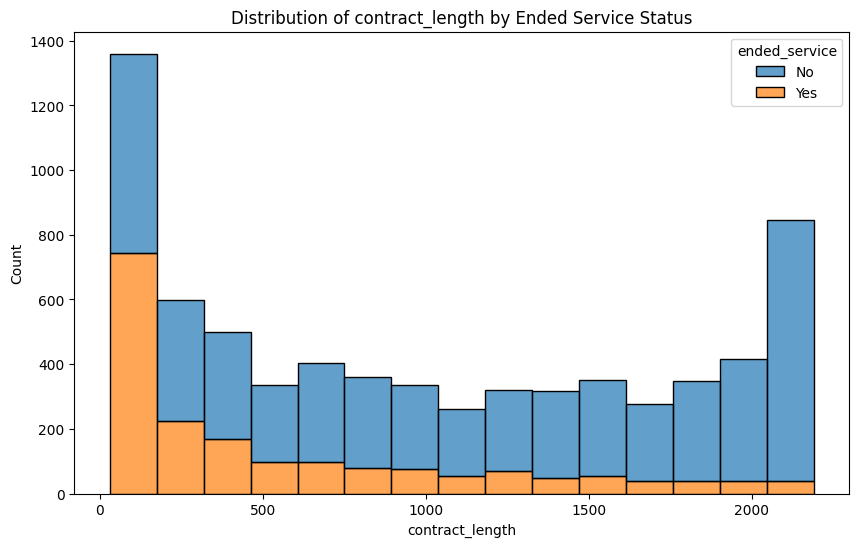

In [42]:
# Create features for continuous columns by excluding 'ended_service' from the list
continuous_features = ['monthly_charges', 'contract_length']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_merged, x=feature, hue='ended_service', multiple='stack', alpha=0.7)
    plt.title(f'Distribution of {feature} by Ended Service Status')
    plt.show()

When it comes to some of the continuous features, price did not seem to be the best indicator of whether a customer would leave or not. Though customers who are paying between $70-100 appear to have the highest churn rate but considering the number of customers who still kept their services in that range, price doesn't appear to be the deciding factor in whether someone stays or leaves.

When looking at contract length, customers appear most likely to leave early on with the vulnerable period being between about 0-250 days of service. So it seems that my earlier suggestion of offering discounted services to people who sign two year contracts, sign up for automatic payments, dsl lines, and added internet services (especially online security, device protection, and tech support) could help to decrease the churn rate of newer customers.

## Step 3: Preparing the date for the models

In this step, I am going to use the OneHotEncoder technique to encode the categorical data for my features columns and LabelEncoder for my target column.

Next, I will define my features and target variables.

Then, I am going to split the data into training and testing sets using an 80/20 split. I will not be using a validation set, since I plan to use a KFold for cross-validation. 

### Encoding categorical data

In [43]:
# Encode features columns using OneHotEncoder
df_encoded = pd.get_dummies(df_merged, columns=categorical_features, dtype=int, drop_first=True)

# Encode target columns using LabelEncoder'
le = LabelEncoder()
df_encoded['ended_service'] = le.fit_transform(df_encoded['ended_service'])

print("Encoded Dataframe:")
df_encoded.head(10) 

Encoded Dataframe:


,customer_id,monthly_charges,total_charges,ended_service,contract_length,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,...,device_protection_Yes,device_protection_missing,tech_support_Yes,tech_support_missing,streaming_tv_Yes,streaming_tv_missing,streaming_movies_Yes,streaming_movies_missing,multiple_lines_Yes,multiple_lines_missing
0,7590-VHVEG,29.85,29.85,0,31,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,56.95,1889.50,0,1036,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,53.85,108.15,1,61,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,42.30,1840.75,0,1371,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,9237-HQITU,70.70,151.65,1,61,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,9305-CDSKC,99.65,820.50,1,245,0,0,1,0,1,...,1,0,0,0,1,0,1,0,1,0
6,1452-KIOVK,89.10,1949.40,0,671,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
7,6713-OKOMC,29.75,301.90,0,306,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,7892-POOKP,104.80,3046.05,1,853,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
9,6388-TABGU,56.15,3487.95,0,1888,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Categorical data for both the features and target column have been successfully encoded for machine learning models.

### Defining the features and target variables

In [44]:
features = df_encoded.drop(['customer_id', 'ended_service'], axis=1)
target = df_encoded['ended_service']

print(f"Features shape: {features.shape}")
print('')
print(f"Target shape: {target.shape}")

Features shape: (7032, 29)

Target shape: (7032,)


The features and targets have been successfully created for the models

### Splitting the data into training and testing sets

In [45]:

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)


print(f"features train set: {features_train.shape}")
print('')
print(f"features test set: {features_test.shape}")
print('')
print(f"target train set: {target_train.shape}")
print('')
print(f"target test set: {target_test.shape}")

features train set: (5625, 29)

features test set: (1407, 29)

target train set: (5625,)

target test set: (1407,)


The data has been split into training and testing sets using an 80/20 split

## Step 4: Training the models

In this step, I will be training models best suited for this binary classification task. I will use a KFold method for hyperparameter tuning rather than using a validation set. I will be using the AUC-ROC metric to measure the accuracy of each model.

I will train the following models:
* Dummy Classifier (for sanity testing)
* Logistical Regression (this is a deviation for the work plan as this is the better model for the task)
* Decision Tree Classifier
* Random Forest Classifier
* K-Nearest Neighbor
* LGBMClassifier
* XGBMClassifier
* CatBoostClassifier

I will train each model 3 times using a variety of strategies to address the class imbalances of the categorical columns.
First, I will run the models without adjusting the imbalance as a baseline
I will employ the downsampling method and then the upsampling method to address the class embalances.

Afterwards, I will analyze the performance of the models and select the best model for testing.

### Training the models without addressing class imbalance

In [ ]:
# Define the models

classifiers = {
    'Dummy': DummyClassifier(strategy='prior'),
    # Use a pipeline for scaling in Logistic Regression

    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(random_state=42, solver='saga', max_iter=5000))
    ]),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNearestNeighbors': KNeighborsClassifier(),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Define the parameters
param_grids = {
    'Dummy': {},
    'LogisticRegression': {
        'log_reg__C': [0.1, 1.0, 10.0],
        'log_reg__penalty': ['l2']
    },
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [1, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15]
    },
    'KNearestNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    }
}


# Use Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
training_times = {}
best_cv_scores = {}

for name, clf in classifiers.items():
    print(f"--- Training {name} ---")
    start_time = time.time()

    if name in param_grids:
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[name],
            scoring='roc_auc',
            cv=kfold,
            n_jobs=-1
        )
        grid_search.fit(features_train, target_train)
        best_model = grid_search.best_estimator_
        best_cv_score = grid_search.best_score_

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best AUC-ROC on cross-validation: {best_cv_score:.4f}")
    else:
        clf.fit(_features_train, target_train)
        best_model = clf
        best_cv_score = 'N/A'
        print(f"Model fitted for {name}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    best_models[name] = best_model
    best_cv_scores[name] = best_cv_score
    training_times[name] = elapsed_time
    
    print(f"Time taken: {elapsed_time:.2f} seconds\n")

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': best_models.keys(),
    'Best Cross-Validation Score (AUC-ROC)': best_cv_scores.values(),
    'Training Time (s)': training_times.values(),
    'Best Parameters': [
        best_models[name].get_params() if name in param_grids and param_grids[name] else 'N/A'
        for name in best_models.keys()
    ]
})

print("--- Training Summary ---")
print(results_df.sort_values(by='Best Cross-Validation Score (AUC-ROC)', ascending=False))

--- Training Dummy ---
Best parameters for Dummy: {}
Best AUC-ROC on cross-validation: 0.5000
Time taken: 1.06 seconds

--- Training LogisticRegression ---
Best parameters for LogisticRegression: {'log_reg__C': 10.0, 'log_reg__penalty': 'l2'}
Best AUC-ROC on cross-validation: 0.8437
Time taken: 1.47 seconds

--- Training DecisionTree ---
Best parameters for DecisionTree: {'max_depth': 5, 'min_samples_leaf': 5}
Best AUC-ROC on cross-validation: 0.8400
Time taken: 0.60 seconds

--- Training RandomForest ---
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}
Best AUC-ROC on cross-validation: 0.8546
Time taken: 8.71 seconds

--- Training KNearestNeighbors ---
Best parameters for KNearestNeighbors: {'n_neighbors': 9, 'weights': 'uniform'}
Best AUC-ROC on cross-validation: 0.7848
Time taken: 1.79 seconds

--- Training LGBM ---
Best parameters for LGBM: {'learning_rate': 0.1, 'n_estimators': 200}
Best AUC-ROC on cross-validation: 0.8967
Time taken: 2.11 seconds

--- Trai


So for the first set of models, I tested the models without addressing the class imbalances in the data but using a KFold method instead of a validation set.

Here are the results:

**Best models without addressing class imbalance**

| Model Name | AUC-ROC Score | Best Hyperparameters | Time Taken |
| ---------- | ------------- | -------------------- | ---------- |
| Dummy Classifier | 0.5000 | N\A | 1.04 seconds |
| Logistical Regressor| 0.8437 | 'log_reg__C': 10.0, 'log_reg__penalty': 'l2' | 1.47 seconds |
| Decision Tree Classifier | 0.8400 | 'max_depth': 5, 'min_samples_leaf': 5 | 0.60 seconds |
| Random Forest Classifier |0.8546 | 'max_depth': 10, 'n_estimators': 200 | 8.72 seconds |
| K Nearest Neighbor Classifier | 0.7848 | 'n_neighbors': 9, 'weights': 'uniform'| 1.88 seconds |
| LGBMClassifier | 0.8967 | 'learning_rate': 0.1, 'n_estimators': 200 | 2.32 seconds |
| XGBClassifier | 0.0.8961 | 'learning_rate': 0.1, 'n_estimators': 200 | 627.12 seconds |
| CatBoostClassifier |0.8995 | 'iterations': 200, 'learning_rate': 0.1 | 7.70 seconds |

An analysis of the results shows that the CatBoostClassifier with hyperparameters of 'iterations': 200, 'learning_rate': 0.1, performed the best with a AUC-ROC score of 0.8995, taking 7.70 seconds to complete training. 


### Training the models using downsampling to handle class imbalance in the data

It appears that all categorical columns were able to be successfully downsampled. Now it is time to apply the downsampling to the models.

In [ ]:
# Define Downsampling

def downsample_corrected(features, target, random_state=7):
   
# Identify the majority and minority classes
    class_counts = target.value_counts()
    if len(class_counts) < 2:
        print("Warning: Only one class found. Downsampling not possible.")
        return features, target
        
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    
# Separate majority and minority classes
    features_majority = features[target == majority_class]
    target_majority = target[target == majority_class]
    features_minority = features[target == minority_class]
    target_minority = target[target == minority_class]

# Downsample to match the minority class size
    n_minority_samples = len(target_minority)
    if n_minority_samples == 0:
        print("Warning: The minority class has 0 samples. Downsampling cannot be performed.")
        return features, target

    features_majority_downsampled = features_majority.sample(n=n_minority_samples, random_state=random_state)
    target_majority_downsampled = target_majority.sample(n=n_minority_samples, random_state=random_state)

# Combine the downsampled majority class with the minority class
    features_balanced = pd.concat([features_majority_downsampled, features_minority])
    target_balanced = pd.concat([target_majority_downsampled, target_minority])

# Shuffle the dataset to mix the classes
    return shuffle(features_balanced, target_balanced, random_state=random_state)

# Apply downsampling to the training data
features_downsampled_shuffled, target_downsampled_shuffled = downsample_corrected(features_train, target_train, random_state=12345)

# Define the models
classifiers = {
    'Dummy': DummyClassifier(strategy='prior'),
    # Use a pipeline for scaling in Logistic Regression
    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(random_state=42, solver='saga', max_iter=5000))
    ]),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNearestNeighbors': KNeighborsClassifier(),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Define the parameters
param_grids = {
    'Dummy': {},
    'LogisticRegression': {
        'log_reg__C': [0.1, 1.0, 10.0],
        'log_reg__penalty': ['l2']
    },
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [1, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15]
    },
    'KNearestNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    }
}


# Use K-Fold cross-validation on the downsampled data
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_models_downsampled = {}
training_times_downsampled = {}
best_cv_scores_downsampled = {}

for name, clf in classifiers.items():
    print(f"--- Training {name} with Downsampled Data ---")
    start_time = time.time()

    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[name],
            scoring='roc_auc',
            cv=kfold,
            n_jobs=-1
        )
        grid_search.fit(features_downsampled_shuffled, target_downsampled_shuffled)
        best_model = grid_search.best_estimator_
        best_cv_score = grid_search.best_score_
        
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best AUC-ROC on cross-validation: {best_cv_score:.4f}")
    else:
        # For DummyClassifier
        clf.fit(features_downsampled_shuffled, target_downsampled_shuffled)
        best_model = clf
      
        best_cv_score = 'N/A (Dummy)'
        print(f"Model fitted for {name}")
    
   
    end_time = time.time()
    elapsed_time = end_time - start_time
    
   
    best_models_downsampled[name] = best_model
    best_cv_scores_downsampled[name] = best_cv_score
    training_times_downsampled[name] = elapsed_time
    
    print(f"Time taken: {elapsed_time:.2f} seconds\n")

# Display results in a DataFrame
results_downsampled_df = pd.DataFrame({
    'Model': best_models_downsampled.keys(),
    'Best Cross-Validation Score (AUC-ROC)': best_cv_scores_downsampled.values(),
    'Training Time (s)': training_times_downsampled.values(),
    'Best Parameters': [
        best_models_downsampled[name].get_params() if name != 'Dummy' and name in param_grids else 'N/A'
        for name in best_models_downsampled.keys()
    ]
})


# Create a copy and filter out non-numeric scores
numeric_results = results_downsampled_df[
    pd.to_numeric(results_downsampled_df['Best Cross-Validation Score (AUC-ROC)'], errors='coerce').notna()
]

print("--- Training Summary with Downsampled Data ---")
print(numeric_results.sort_values(by='Best Cross-Validation Score (AUC-ROC)', ascending=False))

For the second set of models, I employed downsampling to address class imbalances in the data and utilized a KFold method instead of a validation set.

Here are the results:

**Best models using downsampling**

| Model Name | AUC-ROC Score | Best Hyperparameters | Time Taken |
| ---------- | ------------- | -------------------- | ---------- |
| Dummy Classifier | N/A | N\A | 0.00 seconds |
| Logistical Regressor| 0.8446 | 'log_reg__C': 1.0, 'log_reg__penalty': 'l2' | 1.72 seconds |
| Decision Tree Classifier | 0.8319 | 'max_depth': 7, 'min_samples_leaf': 5 | 0.33 seconds |
| Random Forest Classifier | 0.8544 | 'max_depth': 10, 'n_estimators': 100 | 5.61 seconds |
| K Nearest Neighbor Classifier | 0.7935 | 'n_neighbors': 9, 'weights': 'uniform' | 0.57 seconds |
| LGBMClassifier | 0.8754 | 'learning_rate': 0.1, 'n_estimators': 100 | 1.42 seconds |
| XGBClassifier |  0.8821 | 'learning_rate': 0.1, 'n_estimators': 200 | 510.11 seconds |
| CatBoostClassifier | 0.8803 | 'iterations': 200, 'learning_rate': 0.1 | 5.89 seconds |


An analysis of the results shows that the XGBClassifier with hyperparameters of 'learning_rate': 0.1, 'n_estimators': 200, performed the best with an AUC-ROC score of 0.8803, taking 510.11 seconds; however, this model did not perform as well as the CatBoostClassifier without downsampling, which had an AUC-ROC score of 0.8995. 



In [ ]:
# Define Upsampling
def upsample_corrected(features, target, random_state=7):
    
    # Identify the majority and minority classes
    class_counts = target.value_counts()
    if len(class_counts) < 2:
        print("Warning: Only one class found. Upsampling not possible.")
        return features, target

    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()

    # Separate majority and minority classes
    features_majority = features[target == majority_class]
    target_majority = target[target == majority_class]
    features_minority = features[target == minority_class]
    target_minority = target[target == minority_class]

    # Upsample to match the majority class size
    n_majority_samples = len(target_majority)
    if n_majority_samples == 0:
        print("Warning: The majority class has 0 samples. Upsampling cannot be performed.")
        return features, target

    # Use 'replace=True' to allow sampling with replacement
    features_minority_upsampled = features_minority.sample(
        n=n_majority_samples, replace=True, random_state=random_state
    )
    target_minority_upsampled = target_minority.sample(
        n=n_majority_samples, replace=True, random_state=random_state
    )

    # Combine the upsampled minority class with the majority class
    features_balanced = pd.concat([features_majority, features_minority_upsampled])
    target_balanced = pd.concat([target_majority, target_minority_upsampled])

    # Shuffle the dataset to mix the classes
    return shuffle(features_balanced, target_balanced, random_state=random_state)


# Apply upsampling to the training data
features_upsampled_shuffled, target_upsampled_shuffled = upsample_corrected(
    features_train, target_train, random_state=12345
)

# Define the models 
classifiers = {
    'Dummy': DummyClassifier(strategy='prior'),
    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(random_state=42, solver='saga', max_iter=5000))
    ]),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNearestNeighbors': KNeighborsClassifier(),
    'LGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Define the parameters 
param_grids = {
    'Dummy': {},
    'LogisticRegression': {
        'log_reg__C': [0.1, 1.0, 10.0],
        'log_reg__penalty': ['l2']
    },
    'DecisionTree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [1, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15]
    },
    'KNearestNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'learning_rate': [0.05, 0.1]
    }
}

# Use K-Fold cross-validation on the upsampled data
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_models_upsampled = {}
training_times_upsampled = {}
best_cv_scores_upsampled = {}

for name, clf in classifiers.items():
    print(f"--- Training {name} with Upsampled Data ---")
    start_time = time.time()

    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[name],
            scoring='roc_auc',
            cv=kfold,
            n_jobs=-1
        )
        grid_search.fit(features_upsampled_shuffled, target_upsampled_shuffled)
        best_model = grid_search.best_estimator_
        best_cv_score = grid_search.best_score_
        
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best AUC-ROC on cross-validation: {best_cv_score:.4f}")
    else:
        # For DummyClassifier
        clf.fit(features_upsampled_shuffled, target_upsampled_shuffled)
        best_model = clf
        best_cv_score = 'N/A (Dummy)'
        print(f"Model fitted for {name}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    best_models_upsampled[name] = best_model
    best_cv_scores_upsampled[name] = best_cv_score
    training_times_upsampled[name] = elapsed_time
    
    print(f"Time taken: {elapsed_time:.2f} seconds\n")

# Display results in a DataFrame
results_upsampled_df = pd.DataFrame({
    'Model': best_models_upsampled.keys(),
    'Best Cross-Validation Score (AUC-ROC)': best_cv_scores_upsampled.values(),
    'Training Time (s)': training_times_upsampled.values(),
    'Best Parameters': [
        best_models_upsampled[name].get_params() if name != 'Dummy' and name in param_grids else 'N/A'
        for name in best_models_upsampled.keys()
    ]
})

# Create a copy and filter out non-numeric scores
numeric_results = results_upsampled_df[
    pd.to_numeric(results_upsampled_df['Best Cross-Validation Score (AUC-ROC)'], errors='coerce').notna()
]

print("--- Training Summary with Upsampled Data ---")
print(numeric_results.sort_values(by='Best Cross-Validation Score (AUC-ROC)', ascending=False))


For the third set of models, I employed upsampling to address class imbalances in the data and utilized a KFold method instead of a validation set.

Here are the results:

**Best models using upsampling**

| Model Name | AUC-ROC Score | Best Hyperparameters | Time Taken |
| ---------- | ------------- | -------------------- | ---------- |
| Dummy Classifier | N/A | N\A | 0.00 seconds |
| Logistical Regressor|0.8457 | 'log_reg__C': 1.0, 'log_reg__penalty': 'l2' |  2.67 seconds |
| Decision Tree Classifier | 0.8783 |'max_depth': 10, 'min_samples_leaf': 10 |  0.75 seconds |
| Random Forest Classifier | 0.9704 | 'max_depth': 15, 'n_estimators': 200 | 11.55 seconds |
| K Nearest Neighbor Classifier | 0.9628 | 'n_neighbors': 9, 'weights': 'distance' | 3.71 seconds |
| LGBMClassifier | 0.9702 | 'learning_rate': 0.1, 'n_estimators': 200 | 2.87 seconds |
| XGBClassifier |  0.9583 | 'learning_rate': 0.1, 'n_estimators': 200 | 865.71 seconds |
| CatBoostClassifier | 0.9442 | 'iterations': 200, 'learning_rate': 0.1 | 8.73 seconds |


An analysis of the results shows that the Random Forest Classifier with hyperparameters of 'max_depth': 15, 'n_estimators': 200, performed the best with an AUC-ROC score of 0.9704, taking 11.55 seconds. This was the best-performing model of all models. However, further investigation into the data shows that the LGBClassifier performed almost the same and did so in a quarter of the time it took the Random Forest Classifier. The LGBClassifier with hyperparameters of 'learning_rate': 0.1, 'n_estimators': 200, performed the best with an AUC-ROC score of 0.9702, taking 2.87 seconds. So, when factoring both time and accuracy, the model I will proceed with is the LGBMClassifier.


## Step 5: Testing the best model

As stated in the analysis in the last step, I will proceed with testing the LGBMClassifier built with the upsampled tuning. This model performed with high accuracy as well as fast speeds.

In [ ]:
# Call the best LGBM model from the grid search
best_lgbm_model = best_models_upsampled['LGBM']

# Start timer for evaluation
start_eval_time = time.time()


# Make predictions on the original test data
test_predictions = best_lgbm_model.predict_proba(features_test)[:, 1]


# Calculate ROC AUC score
test_roc_auc = roc_auc_score(target_test, test_predictions)

# Stop timer for evaluation
end_eval_time = time.time()
eval_time = end_eval_time - start_eval_time

# Print the results, including evaluation time
print(f"AUC-ROC on the original (imbalanced) test set: {test_roc_auc:.4f}")
print(f"Evaluation time on the test set: {eval_time:.4f} seconds")


Although the model's performance on the testing data was lower, it still achieved a high level of accuracy, with an ROC_AUC score of 0.9168. It also performed with a high speed of 0.0105 seconds. 

To further analyze the results, I will show the ROC Curve on the testing set. I will also print the confusion matrix and classification report.

In [ ]:
# Generate and plot the ROC Curve 
test_predictions = best_lgbm_model.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, test_predictions)  
roc_auc = auc(fpr, tpr) 


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LGBM Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create predictions for the confusion matrix
test_predictions_classes = best_lgbm_model.predict(features_test)

# Generate and plot the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(target_test, test_predictions_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=['Class 0', 'Class 1'])
cm_display.plot(cmap=plt.cm.Blues)
cm_display.ax_.set_title('Confusion Matrix for LGBM Model')
plt.show()

# Generate the Classification Report 
print("\n--- Classification Report ---")
#
print(classification_report(target_test, test_predictions_classes, target_names=['Class 0', 'Class 1']))

# Print Test ROC AUC Score
print(f"AUC-ROC on the original (imbalanced) test set: {roc_auc:.4f}")

The results of the model graph, matrix, and report show that the model does well when distinguishing between the majority and minority classes. This data had a fairly large class imbalance overall, so the upsampling was effective in training the model to make the distinction between classes. The model was more effective in distinguishing between the majority class than it was at distinguishing the minority class, but it was able to distinguish the minority class 77% of the time. 

If I were to build this model again, I would be interested in utilizing a combination of methods such as Synthetic Minority Over-sampling Technique (SMOTE) and Undersampling to see if I could improve my model's ability to predict the minority class.

## Step 6: Comprehensive Report

### Conclusion

**Task**
In this project, I was tasked with building a model that could accurately predict the churn rate for the company Interconnect. My goal was to create a binary classification model that could predict churn rate with an AUC-ROC score of 0.88 or higher. 

**Pre-Processing**
During the preprocessing phase of this project, I completed an initial evalution of the four dataframes needed for the project. I discovered that the four dataframes all used the same customer_id numbers There were no duplicate values in the dataframes. No dataframes has missing values; however, not all dataframes had the same number of rows so missing values would need to be addressed once the dataframes were merged. Initially, I fel that all datatypes appeared appropriate, but my evaluation would change later in the project. Only the contact dataframe had statistical data that showed that the minimum cost monthly to customers was 18.25 a month and the maximum charge was 118.75 a month. The mean charge to customers was 64.75 while the median charge was 70.35. This suggested that there was left skewing in the data. The majority of customers were paying approximately 35.50 to 89.95 for their services. All dataframes contained columns that appeared to be categorical in nature.


**Work Plan**
After analyzing the initial data, I devised a six step workplan:
*Step 1: Data processing, cleaning, and features engineering
*Step 2: EDA
*Step 3: Prpearing the data for the models
*Step 4: Training the models
*Step 5: Testing the best model
Step 6: Comprehensive Report


**Step 1: Data processing, cleaning, and features engineering**
During this phase, I began by downloading the additional libraries needed for exploratory data analysis, the models and the model evaluation metrics. I checked all dataframes to ensure that there were no unmatching customer_id numbers before merging the dataframes by the customer_id c9olumn using the outer merging method. Once merged, I addressed missing data by using the string "missing". I changed the column names to the standard snake_case to make data processing seamless. The contact dataframe had two data based columns that were originally in object datatype. I changed the datatype to datetime and dropped the timestamp from the end_date column. I used the two data columns to feature engineer two columns. The first column indicated whether a customer ended their service or not (ended_service). And the other column determined how long a customer had their contract for (contract_length). Once I engineered these features, I dropped the date columns from the dataframe. Finally, I realized later that the datatype for the total_charges column was incorrect. I changed the datatype to float64. This was a deviation from the work plan.


**Step 2: EDA**
In the previous steps, I was suspicious that several of the columns in the dataframe were categorical in nature. To verify this, I checked the dataframe for columns where unique values were limited to no more than 15 values. The results showed that 16 columns were categorical in nature. I changed the datatype to category. Once, I adjusted the datatype, I then checked the value count for each of the unique values in the category columns. I created a pie chart to show the distribution and check for imbalances in the classes. While some columns were relatively balanced, others has great disparities among the classes. In particular, the target column (ended_service). Afterwards, I wanted to check to see which features might help to predict churn. I discovered that customers were more likely to stay if they had 2 year contracts, used automatic payment methods, had DSL lines and added internet services especially device protection, online security, and tech support. Customers were more likley to churn if they were on month to month contracts, received paperless billing, paid using electronic checks, did not have partners or dependents, used fiber optic networks, and did not add additional services for internet. When looking at noncategorical data, the results showed that customers were more likely to leave if they were paying &70-100 a month for service. Customers were most vulnerable to churn during the first 250 days of service.



**Step 3: Preparing the data for the models**
After EDA, I began preparing the data for processing based on the analysis that I did in previous steps. I began by encoding the categorical data. I used OneHotEncoder to code the features and I used LabelEncoder to encode the target. This was a deviation from the work plan as I researched and discovered that it was best not to use OneHotEncoder for target data. I could have manually encoded the data using a loop to identify and change the string data to a numerical systen, but I discovered that LabelEncoder could do this more efficiently. Next, I defined my features by dropping my target and customer_id columns. I identified my target column as ended_date. I split the data into training and target sets using 80/20 split. I decided to use a KFold method for validation instead of using a validation set. 


**Step 4: Training the models**
Once I completed the data preparation step, I began to train the models. I trained 8 models. I trained a dummy model for validation purposes. I also trained Logistical Regression, Decision Tree Classifier, Random Forest Classifier, K-Nearest Neighbor, LGBMClassifier, XGBMClassifier, and CatBoostClassifier models. I deviated from my work plan where I initially said that I could train a Linear Regression model. I realized that logistical regression models were better suited for binary classification tasks. I ran the models 3 times. The first time, I did not adjust the data directly for the class imbalances. The second time, I used downsampling to address class imbalance, and the 3ed time, I used upsampling to address the class imbalance. The results of the showed that upsampling was the best method for addressing class imbalane in most models. The most accurate model after training was the Random Forest Model that produced a AUC-ROC score of 0.9704 in 11.55 seconds. However ehen taking into consideration both speed and accuracy, I opted to test with the LGBMClassifer that provided an AUC-ROC score that was nearly as accurate (0.9702) but trained almost 4 times faster (2.87 seconds).



**Step 5: Testing the best model**
I tested the LGBMClassifier model. While the testing was less accurate than training, the model still produced an accuracy score higher than my target of 0.88. The testing produced an AUC-ROC score of 0.9168 in 0.0105 seconds. To analyze my results, I created a ROC Curve, confusion matrix and classificaton report on my results. It showed that the model was better at predicting the majority class than the minority class. The data had a high class imbalance but upsampling did improve the accuracy of the model when predicting the minority class (which it did with 77% accuracy).

If I were to build this model again, I would like to try using a combination of SMOTE and Oversampling to address the class imbalance to see if it would yield more accurate results.



## Final Solutions Report

As a final step to my project, I will respond to some questions:

**What steps of the plan were performed and what steps were skipped (explain why)?**

For my work plan, I completed a six-step work plan with action items in each step. I completed all the steps and action items in my project as intended without skipping any steps or action items. That said, I did add steps and alter action items. One step I added was changing the datatype of the final_charges column. Initially, I did not catch that this column had the wrong datatype (object), so when I went to train my models in step 4, I was unable to do so. This made me realize my error in not changing the datatype. I was able to go back and make this correction. I also initially stated that I would train a Linear Regression model, but realized later that a Logistical Regression model was a better choice for a binary classification task. After the project was completed, I also noted that I did not address the skew that I saw within the statistical data. Although the LGBMClassification model, which I ultimately selected, is less sensitive to skewed data, this might have made other trained models more accurate. Also, based on my reviewer's feedback, I might have opted to drop some of the less accurate models after the initial training and only selected the top-performing models for downsampling and upsampling training.



**What difficulties did you encounter and how did you manage to solve them?**

So one challenge that I faced during the final project was attempting to pip install some libraries/programs to the TripleTen platform. I ended up messing my my entire notebook. I had to contact tech support for assistance, and this set me back in my process. Since I couldn't use the libraries I initially planned to use, I had to conduct further research to find alternative methods to complete the tasks I wanted to accomplish. Ultimately, I was pleased with my results, but I do feel that I could have built a more accurate model had I been able to use techniques such as SMOTE. 

While I feel like I have strengths with preprocessing data, completing EDA, and analyzing data and results, I still feel like I am learning to create loops, defining functions, and visualizing how outputs should look. It takes me a long time to create the loops for running all the models at once, but I feel that this is a more efficient way to code versus running the models individually. It takes me longer than I would like to complete the loops and to create code that produces the outputs the way that I want them to look. When I get frustrated, I take breaks as needed and then go back to persisting. I know that with more practice and repetition, I will become more proficient in these skills.



**What were some of the key steps to solving the task?**

For this project, I created a work plan. This was my first time creating a work plan, and I really feel like this was a key step in guiding the rest of the project. In many previous projects, I found myself stuck on the next steps and had to research what to do next. The work plan helped provide a strategic map for how I should move, and I was able to reference it when needed to move forward. 

In this project, the feature engineering step was key. The target wasn't in the original data, so the project could not be completed without the feature engineering. Additionally, to run the models, changing data types and encoding categorical data were essential. Lastly, though my raw data training did produce models that met and exceeded the AUC-ROC minimum threshold of 0.88, downsampling and upsampling helped to improve the model's accuracy. 

EDA, although not crucial for model completion, provided valuable insights into the data that would be beneficial from a business and recommendations standpoint. Additionally, this was the first time that I included the ROC Curve, Confusion Matrix, and Classification Report in my projects. Although not essential for creating training and testing the model, it provided valuable insight into the strengths and weaknesses of my model.


**What is your final model and what quality score does it have?**

I tested the LGBMClassifier model. Although this model was not the most accurate during training, it stood out when compared to other models by combining both accuracy and speed. It produces results with nearly the same accuracy as the top model (Random Forest Classifier) but does so 4 times faster. The final results were an AUC-ROC score of 0.9168 in 0.0105 seconds. To analyze my results,